In [1]:
# This is used to increase the notebook's width to fill the screen, allowing for better plot visualization
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import cv2
import time
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from utils import plot

C:\Users\leoar\AppData\Local\Temp\ipykernel_5804\2117630889.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Path to Dataset

In [2]:
# Relative path to dataset
data_dir = os.path.join( "C:\\Datasets\\COVID19\\Tomografia\\COVIDx CT-3A" )
assert os.path.exists( data_dir ), "Unable to find the relative path to COVIDx CT-3A, please check data_dir..."

#
dataset_name = "COVIDx CT-2A"

## Samples Dataframe

In [3]:
# Path to metadata csv
csv_path = os.path.join( data_dir, "new_split_metadata.csv" )

# Reads metadata as dataframe, "age" column is treated as str since "N/A" can't be int
samples_df = pd.read_csv(csv_path, sep = ";", na_filter = False, dtype={"age": str})

samples_df.head()

filename patient_id source     class country sex   age  \
0  NCP_96_1328_0032.png     NCP_96   CNCB  COVID-19   China   M  74.0   
1  NCP_96_1328_0035.png     NCP_96   CNCB  COVID-19   China   M  74.0   
2  NCP_96_1328_0036.png     NCP_96   CNCB  COVID-19   China   M  74.0   
3  NCP_96_1328_0037.png     NCP_96   CNCB  COVID-19   China   M  74.0   
4  NCP_96_1328_0038.png     NCP_96   CNCB  COVID-19   China   M  74.0   

  partition slice_selection  x_min  y_min  x_max  y_max verified_finding  \
0     train          Expert      9     94    512    405              Yes   
1     train          Expert     10    106    512    405              Yes   
2     train          Expert     10    105    512    406              Yes   
3     train          Expert     11    104    512    406              Yes   
4     train          Expert     11    103    512    406              Yes   

    view modality  
0  Axial       CT  
1  Axial       CT  
2  Axial       CT  
3  Axial       CT  
4  Axial       CT

## Patients Dataframe

In [4]:
# Creates a new dataframe with metadata sorted by patient
patient_df = plot.convert_df_sample2patient( samples_df )

patient_df.head()

patient_id source     class country  sex   age partition slice_selection  \
0     NCP_96   CNCB  COVID-19   China    M  74.0     train          Expert   
1    NCP_270   CNCB  COVID-19   China  N/A   N/A       val          Expert   
2    NCP_322   CNCB  COVID-19   China  N/A   N/A     train          Expert   
3   NCP_1276   CNCB  COVID-19   China  N/A   N/A      test          Expert   
4   NCP_2683   CNCB  COVID-19   China  N/A   N/A      test          Expert   

  verified_finding   view modality  sample_count  
0              Yes  Axial       CT           121  
1              Yes  Axial       CT           124  
2              Yes  Axial       CT            40  
3              Yes  Axial       CT            32  
4              Yes  Axial       CT             9

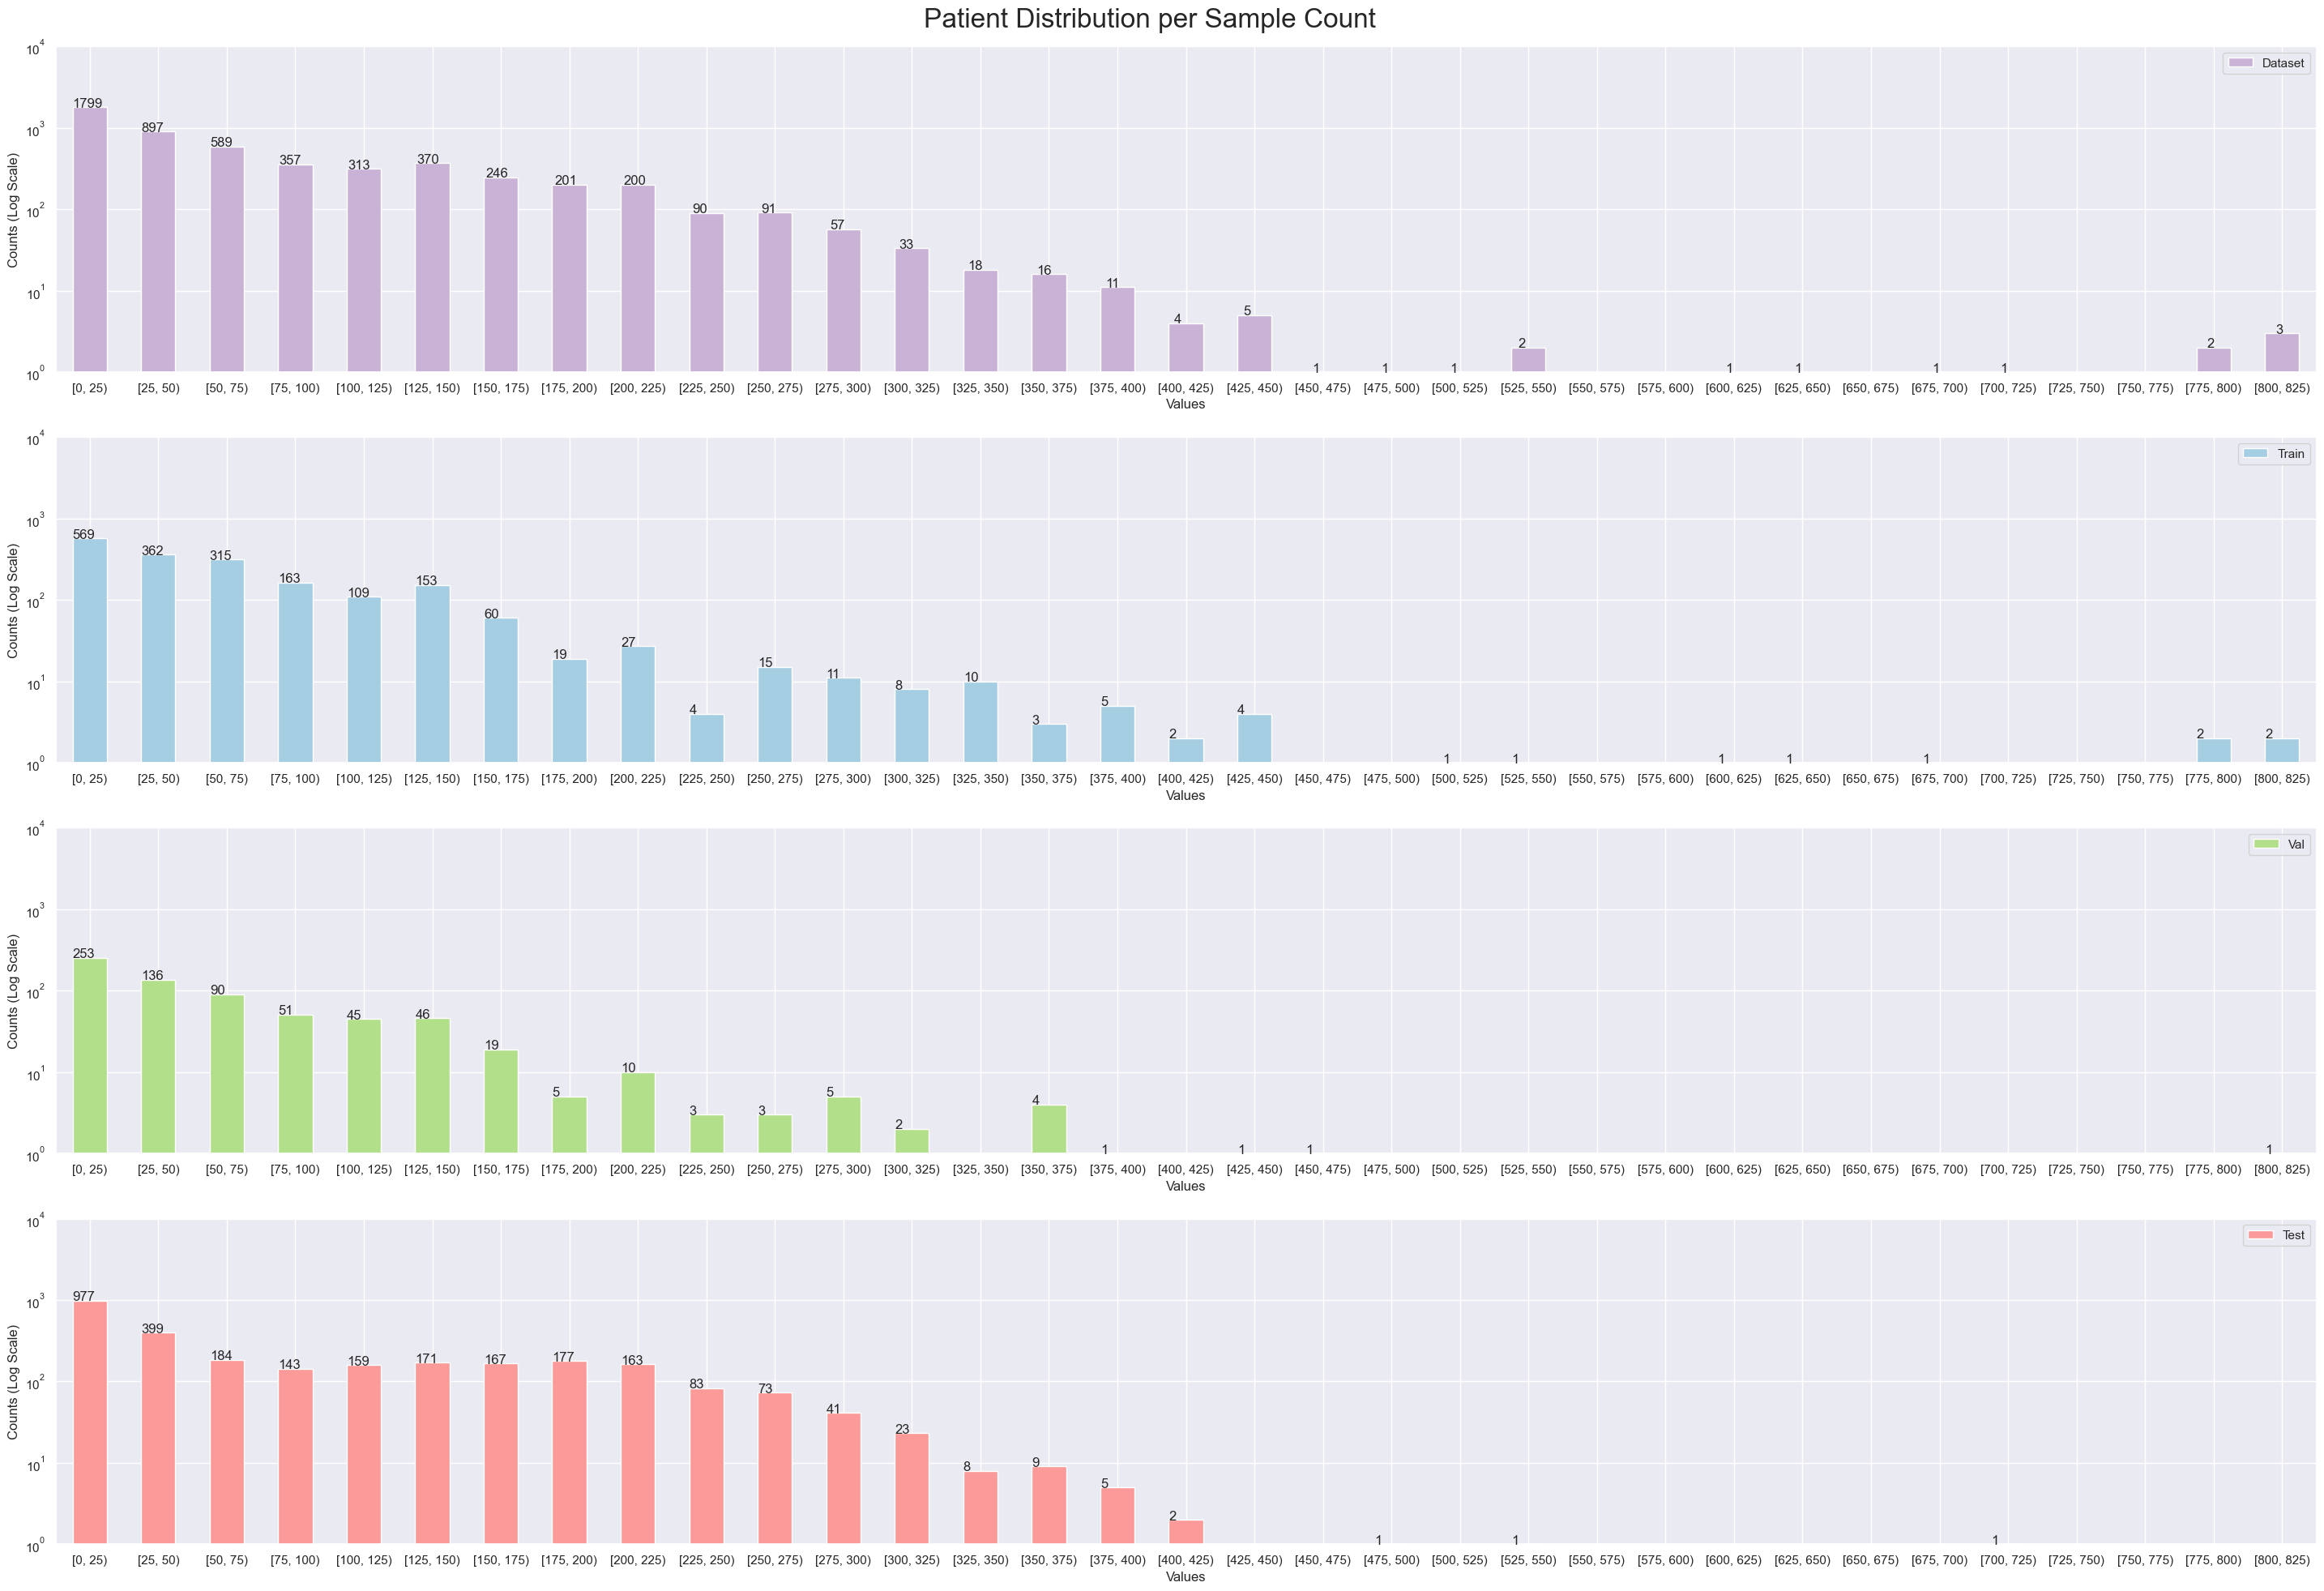

In [5]:
figure = plt.figure( figsize = (36, 24) )
plot.column_per_partition_as_histogram( patient_df, "sample_count", dataset_name, figure, title_complement = "Patient")

In [6]:
counts_df = plot.column_bins_per_partition_as_df( patient_df, "sample_count", dataset_name )
counts_df.head(len(counts_df))

Dataset  Train  Val  Test
Values                               
[0, 25)        1799    569  253   977
[25, 50)        897    362  136   399
[50, 75)        589    315   90   184
[75, 100)       357    163   51   143
[100, 125)      313    109   45   159
[125, 150)      370    153   46   171
[150, 175)      246     60   19   167
[175, 200)      201     19    5   177
[200, 225)      200     27   10   163
[225, 250)       90      4    3    83
[250, 275)       91     15    3    73
[275, 300)       57     11    5    41
[300, 325)       33      8    2    23
[325, 350)       18     10    0     8
[350, 375)       16      3    4     9
[375, 400)       11      5    1     5
[400, 425)        4      2    0     2
[425, 450)        5      4    1     0
[450, 475)        1      0    1     0
[475, 500)        1      0    0     1
[500, 525)        1      1    0     0
[525, 550)        2      1    0     1
[550, 575)        0      0    0     0
[575, 600)        0      0    0     0
[600, 625)        1      1    0     0
[625, 650)        1      1    0     0
[650, 675)        0      0    0     0
[675, 700)        1      1    0     0
[700, 725)        1      0    0     1
[725, 750)        0      0    0     0
[750, 775)        0      0    0     0
[775, 800)        2      2    0     0
[800, 825)        3      2    1     0
SUM            5311   1848  676  2787

# Plots

## Source

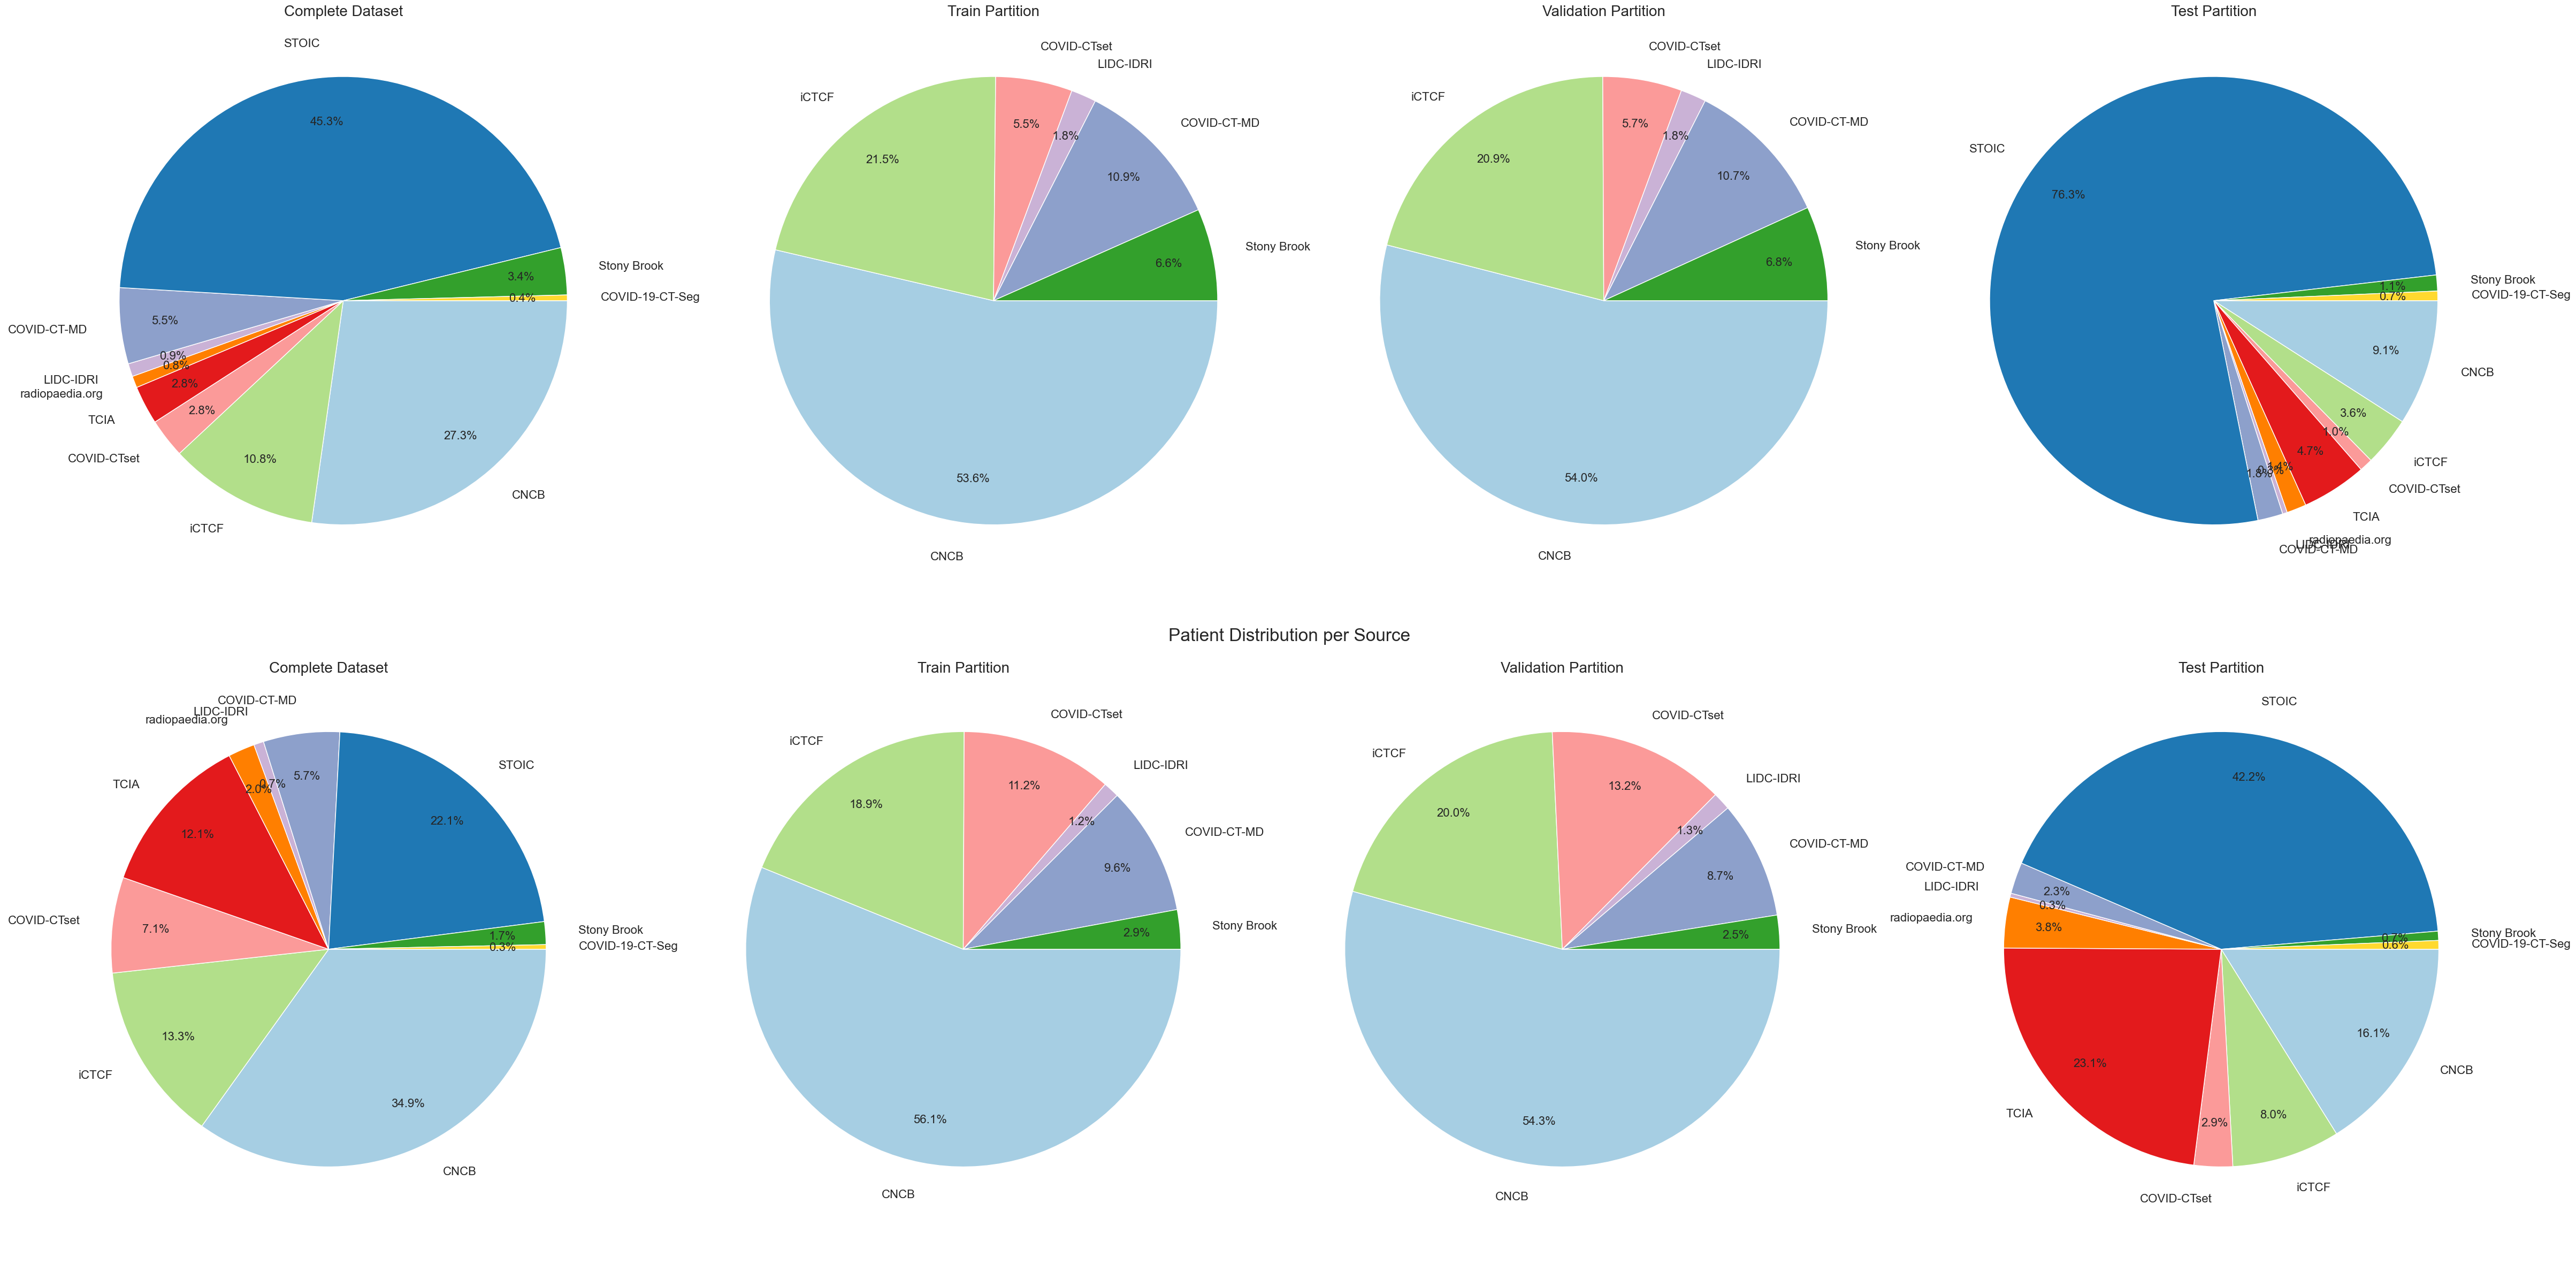

In [7]:
plot.column_as_pies( samples_df, patient_df, "source", dataset_name, figsize = (48, 24) )

In [8]:
plot.column_as_table( samples_df, patient_df, "source", dataset_name, bin_flag = False )

Sample Distribution
 by Source 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 STOIC 
 192361 
 0 
 0 
 192361 
 
 
 CNCB 
 115837 
 70142 
 22833 
 22862 
 
 
 iCTCF 
 45912 
 28116 
 8847 
 8949 
 
 
 COVID-CT-MD 
 23280 
 14187 
 4530 
 4563 
 
 
 Stony Brook 
 14461 
 8691 
 2880 
 2890 
 
 
 COVID-CTset 
 12058 
 7234 
 2413 
 2411 
 
 
 TCIA 
 11816 
 0 
 0 
 11816 
 
 
 LIDC-IDRI 
 3999 
 2380 
 778 
 841 
 
 
 radiopaedia.org 
 3574 
 0 
 0 
 3574 
 
 
 COVID-19-CT-Seg 
 1726 
 0 
 0 
 1726 
 
 
 SUM 
 425024 
 130750 
 42281 
 251993 
 
 
 Patient Distribution
 by Source 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 CNCB 
 1854 
 1038 
 367 
 449 
 
 
 STOIC 
 1176 
 0 
 0 
 1176 
 
 
 iCTCF 
 709 
 350 
 135 
 224 
 
 
 TCIA 
 643 
 0 
 0 
 643 
 
 
 COVID-CTset 
 377 
 208 
 89 
 80 
 
 
 COVID-CT-MD 
 301 
 177 
 59 
 65 
 
 
 radiopaedia.org 
 105 
 0 
 0 
 105 
 
 
 Stony Brook 
 90 
 54 
 17 
 19 
 
 
 LIDC-IDRI 
 39 
 22 
 9 
 8 
 
 
 COVID-19-CT-Seg 
 18 
 0 
 0 
 18 
 
 
 SUM 
 5312 
 1849 
 676 
 2787

## Partition

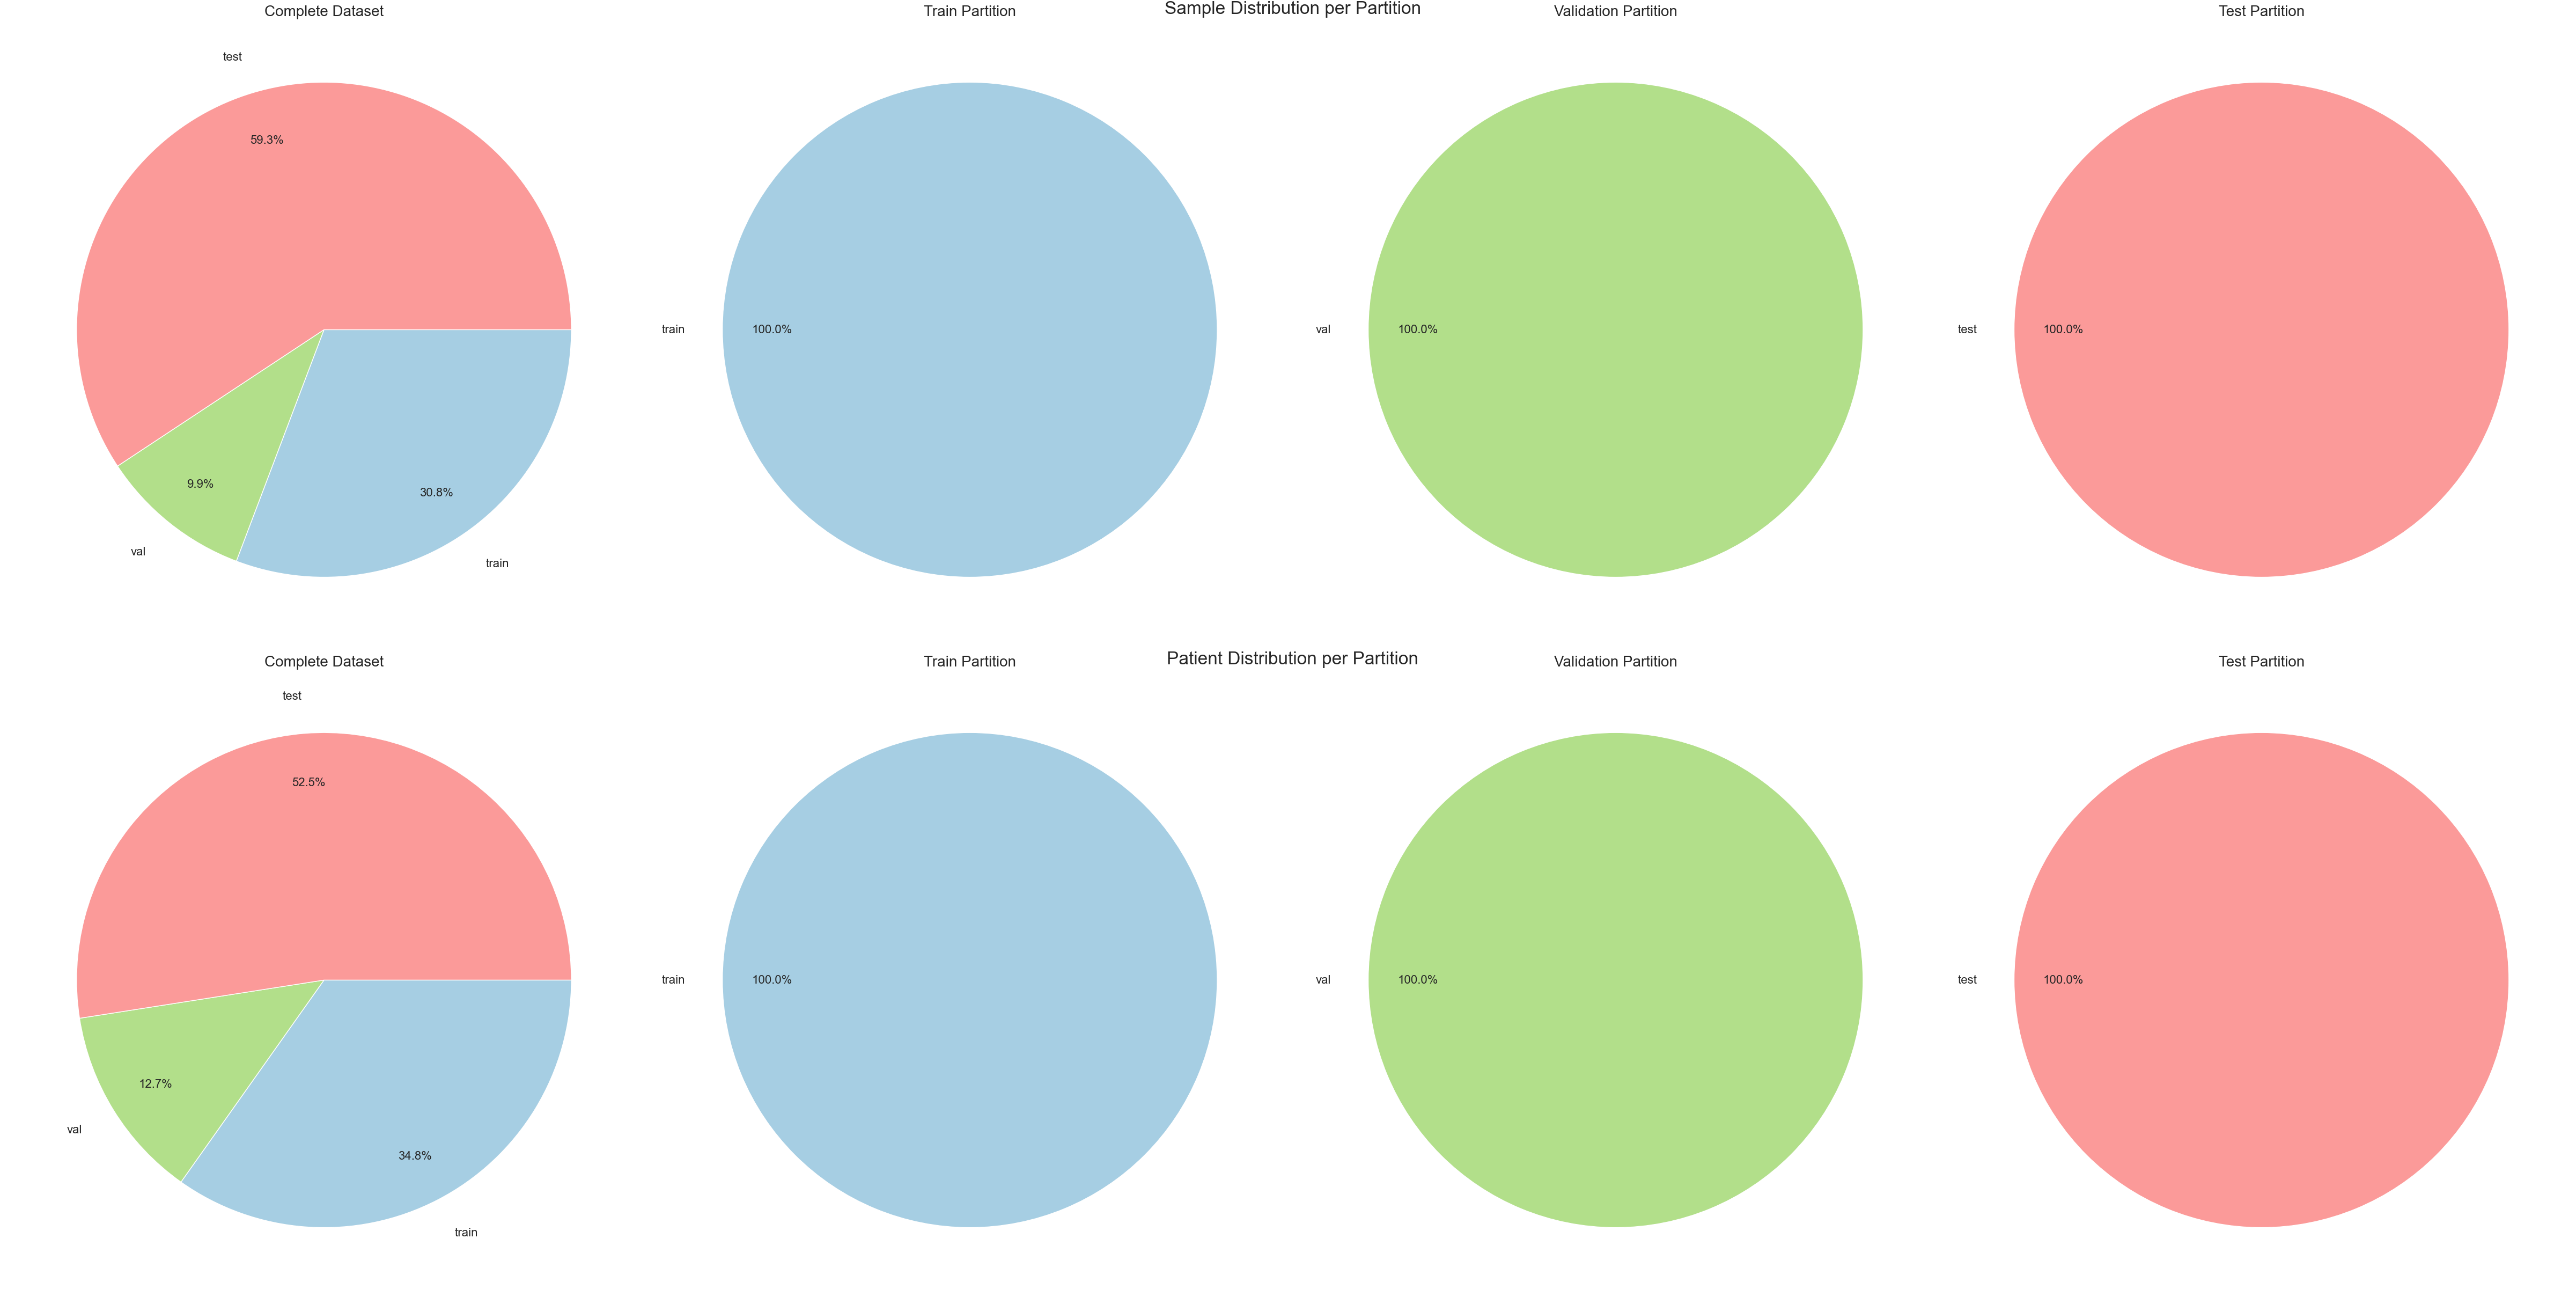

In [9]:
plot.column_as_pies( samples_df, patient_df, "partition", dataset_name, figsize = (48, 24) )

In [10]:
plot.column_as_table( samples_df, patient_df, "partition", dataset_name, bin_flag = False )

Sample Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 test 
 251993 
 0 
 0 
 251993 
 
 
 train 
 130750 
 130750 
 0 
 0 
 
 
 val 
 42281 
 0 
 42281 
 0 
 
 
 SUM 
 425024 
 130750 
 42281 
 251993 
 
 
 Patient Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 test 
 2787 
 0 
 0 
 2787 
 
 
 train 
 1849 
 1849 
 0 
 0 
 
 
 val 
 676 
 0 
 676 
 0 
 
 
 SUM 
 5312 
 1849 
 676 
 2787

## Class

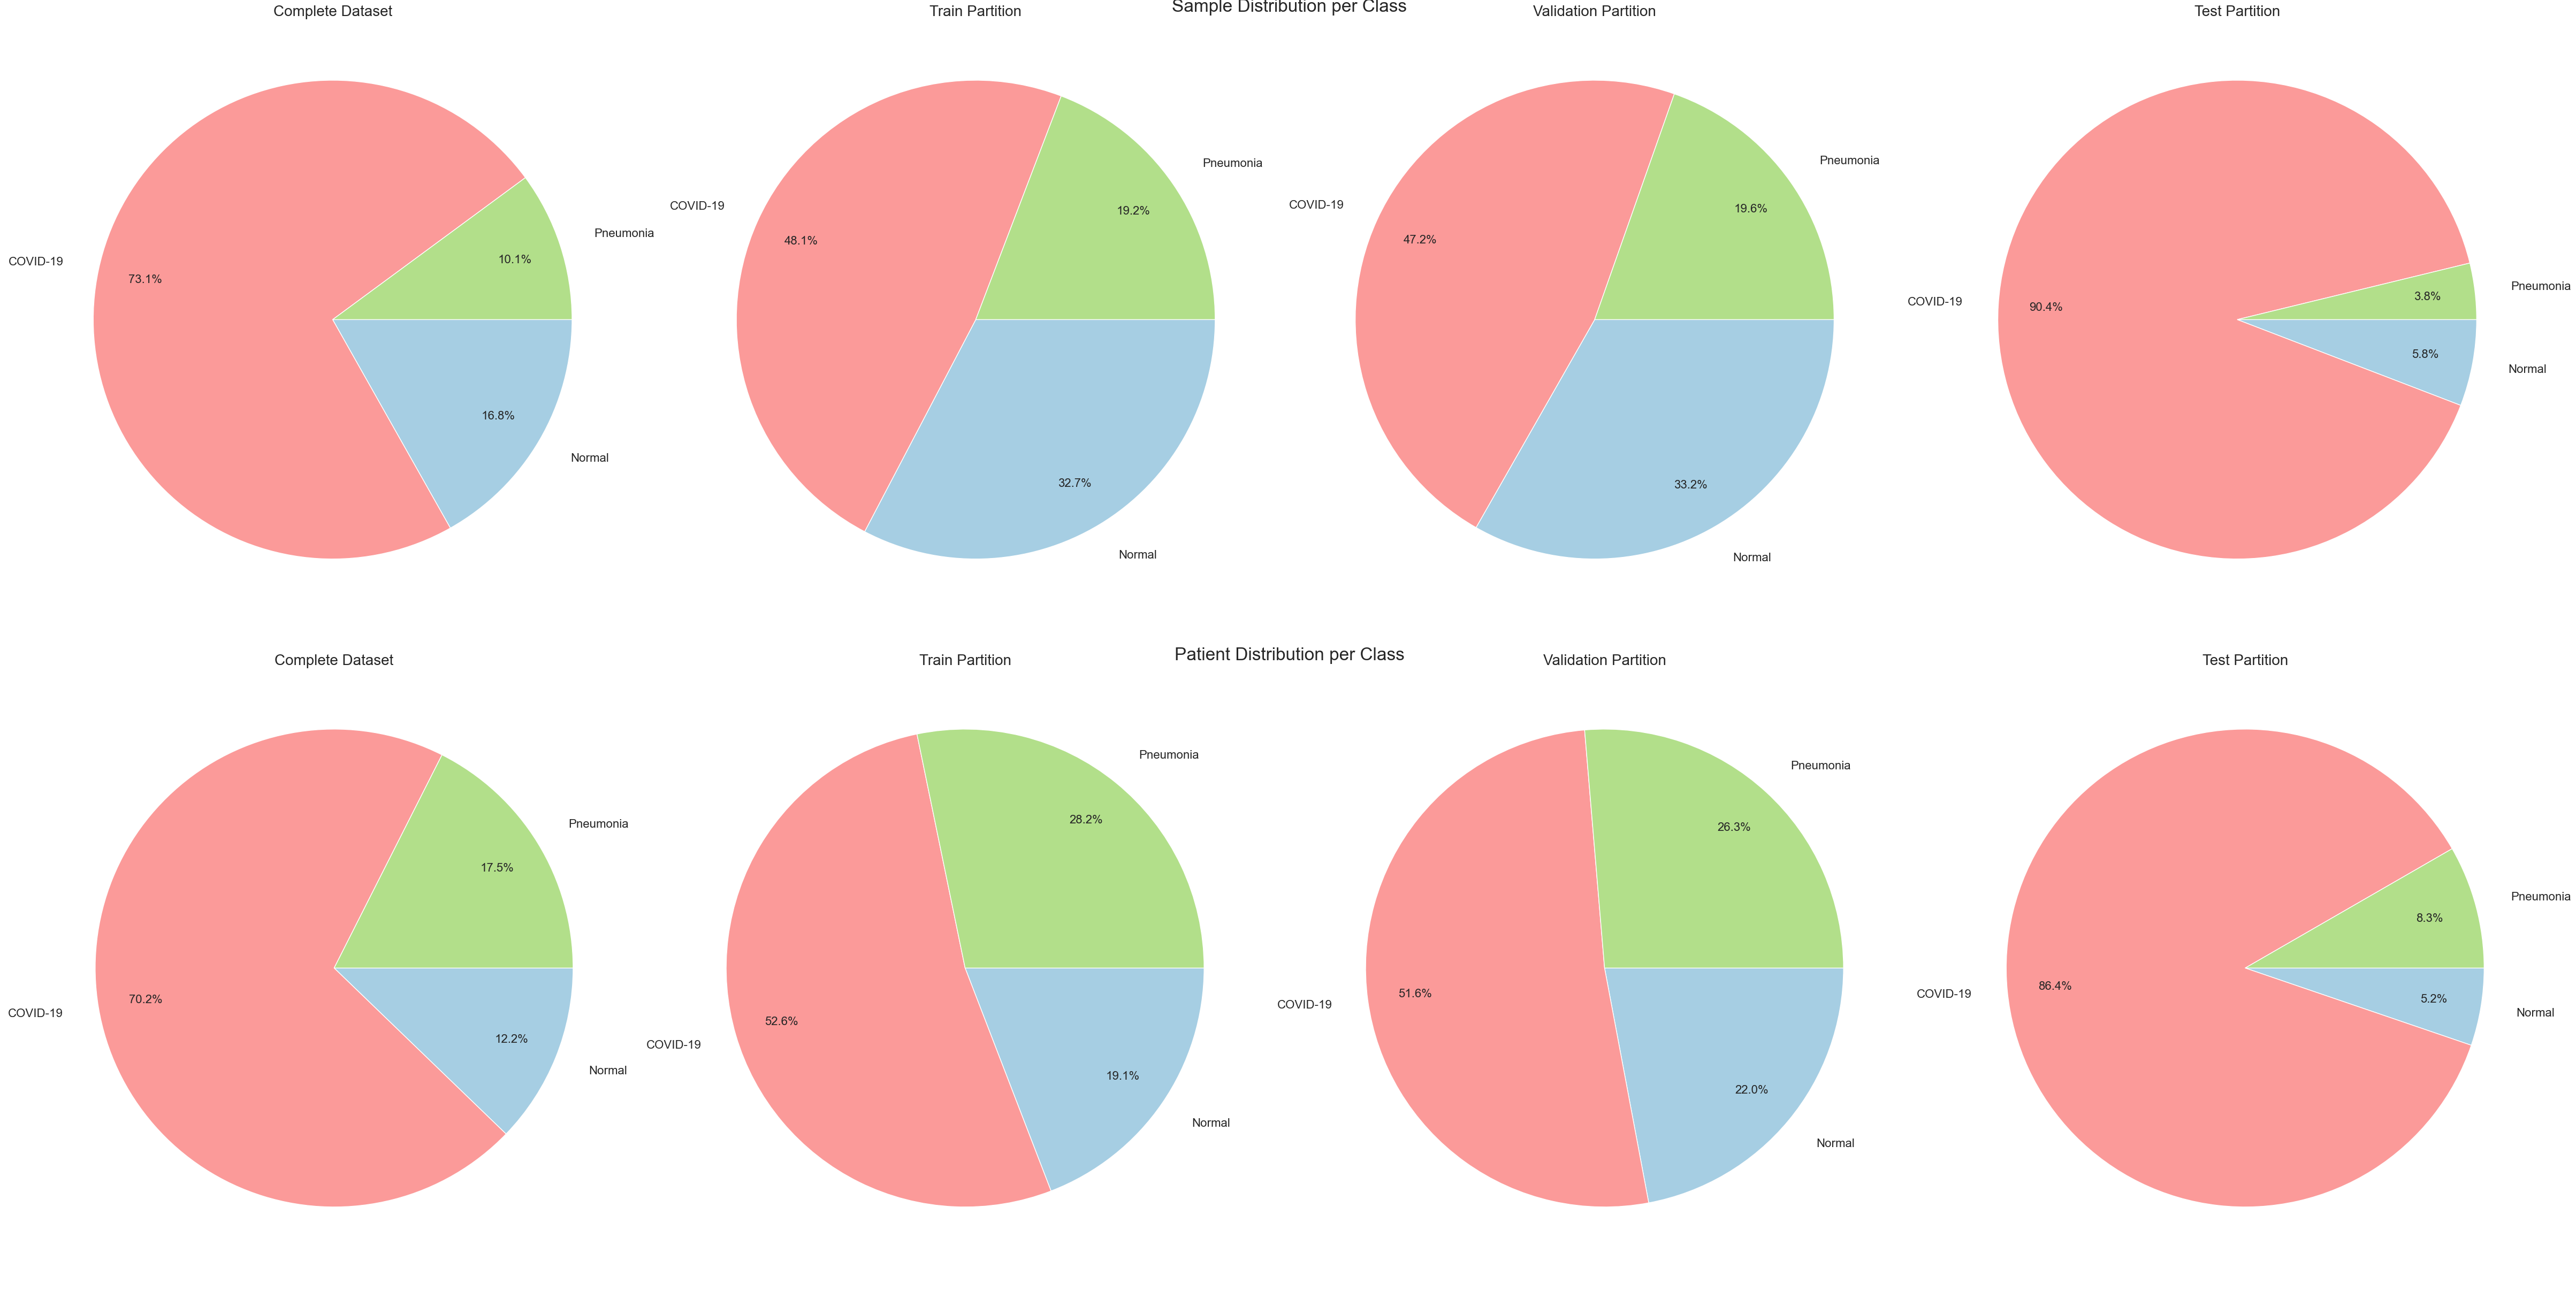

In [11]:
plot.column_as_pies( samples_df, patient_df, "class", dataset_name, figsize = (48, 24) )

In [12]:
plot.column_as_table( samples_df, patient_df, "class", dataset_name, bin_flag = False )

Sample Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 COVID-19 
 310593 
 62928 
 19936 
 227729 
 
 
 Normal 
 71488 
 42730 
 14058 
 14700 
 
 
 Pneumonia 
 42943 
 25092 
 8287 
 9564 
 
 
 SUM 
 425024 
 130750 
 42281 
 251993 
 
 
 Patient Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 COVID-19 
 3731 
 973 
 349 
 2409 
 
 
 Pneumonia 
 932 
 522 
 178 
 232 
 
 
 Normal 
 649 
 354 
 149 
 146 
 
 
 SUM 
 5312 
 1849 
 676 
 2787

## Country

In [13]:
np.unique(samples_df["country"].to_list())

array(['Afghanistan', 'Algeria', 'Australia', 'Azerbaijan', 'Belgium',
       'China', 'England', 'France', 'Iran', 'Italy', 'Lebanon', 'N/A',
       'Peru', 'Scotland', 'Turkey', 'USA', 'Ukraine'], dtype='<U11')

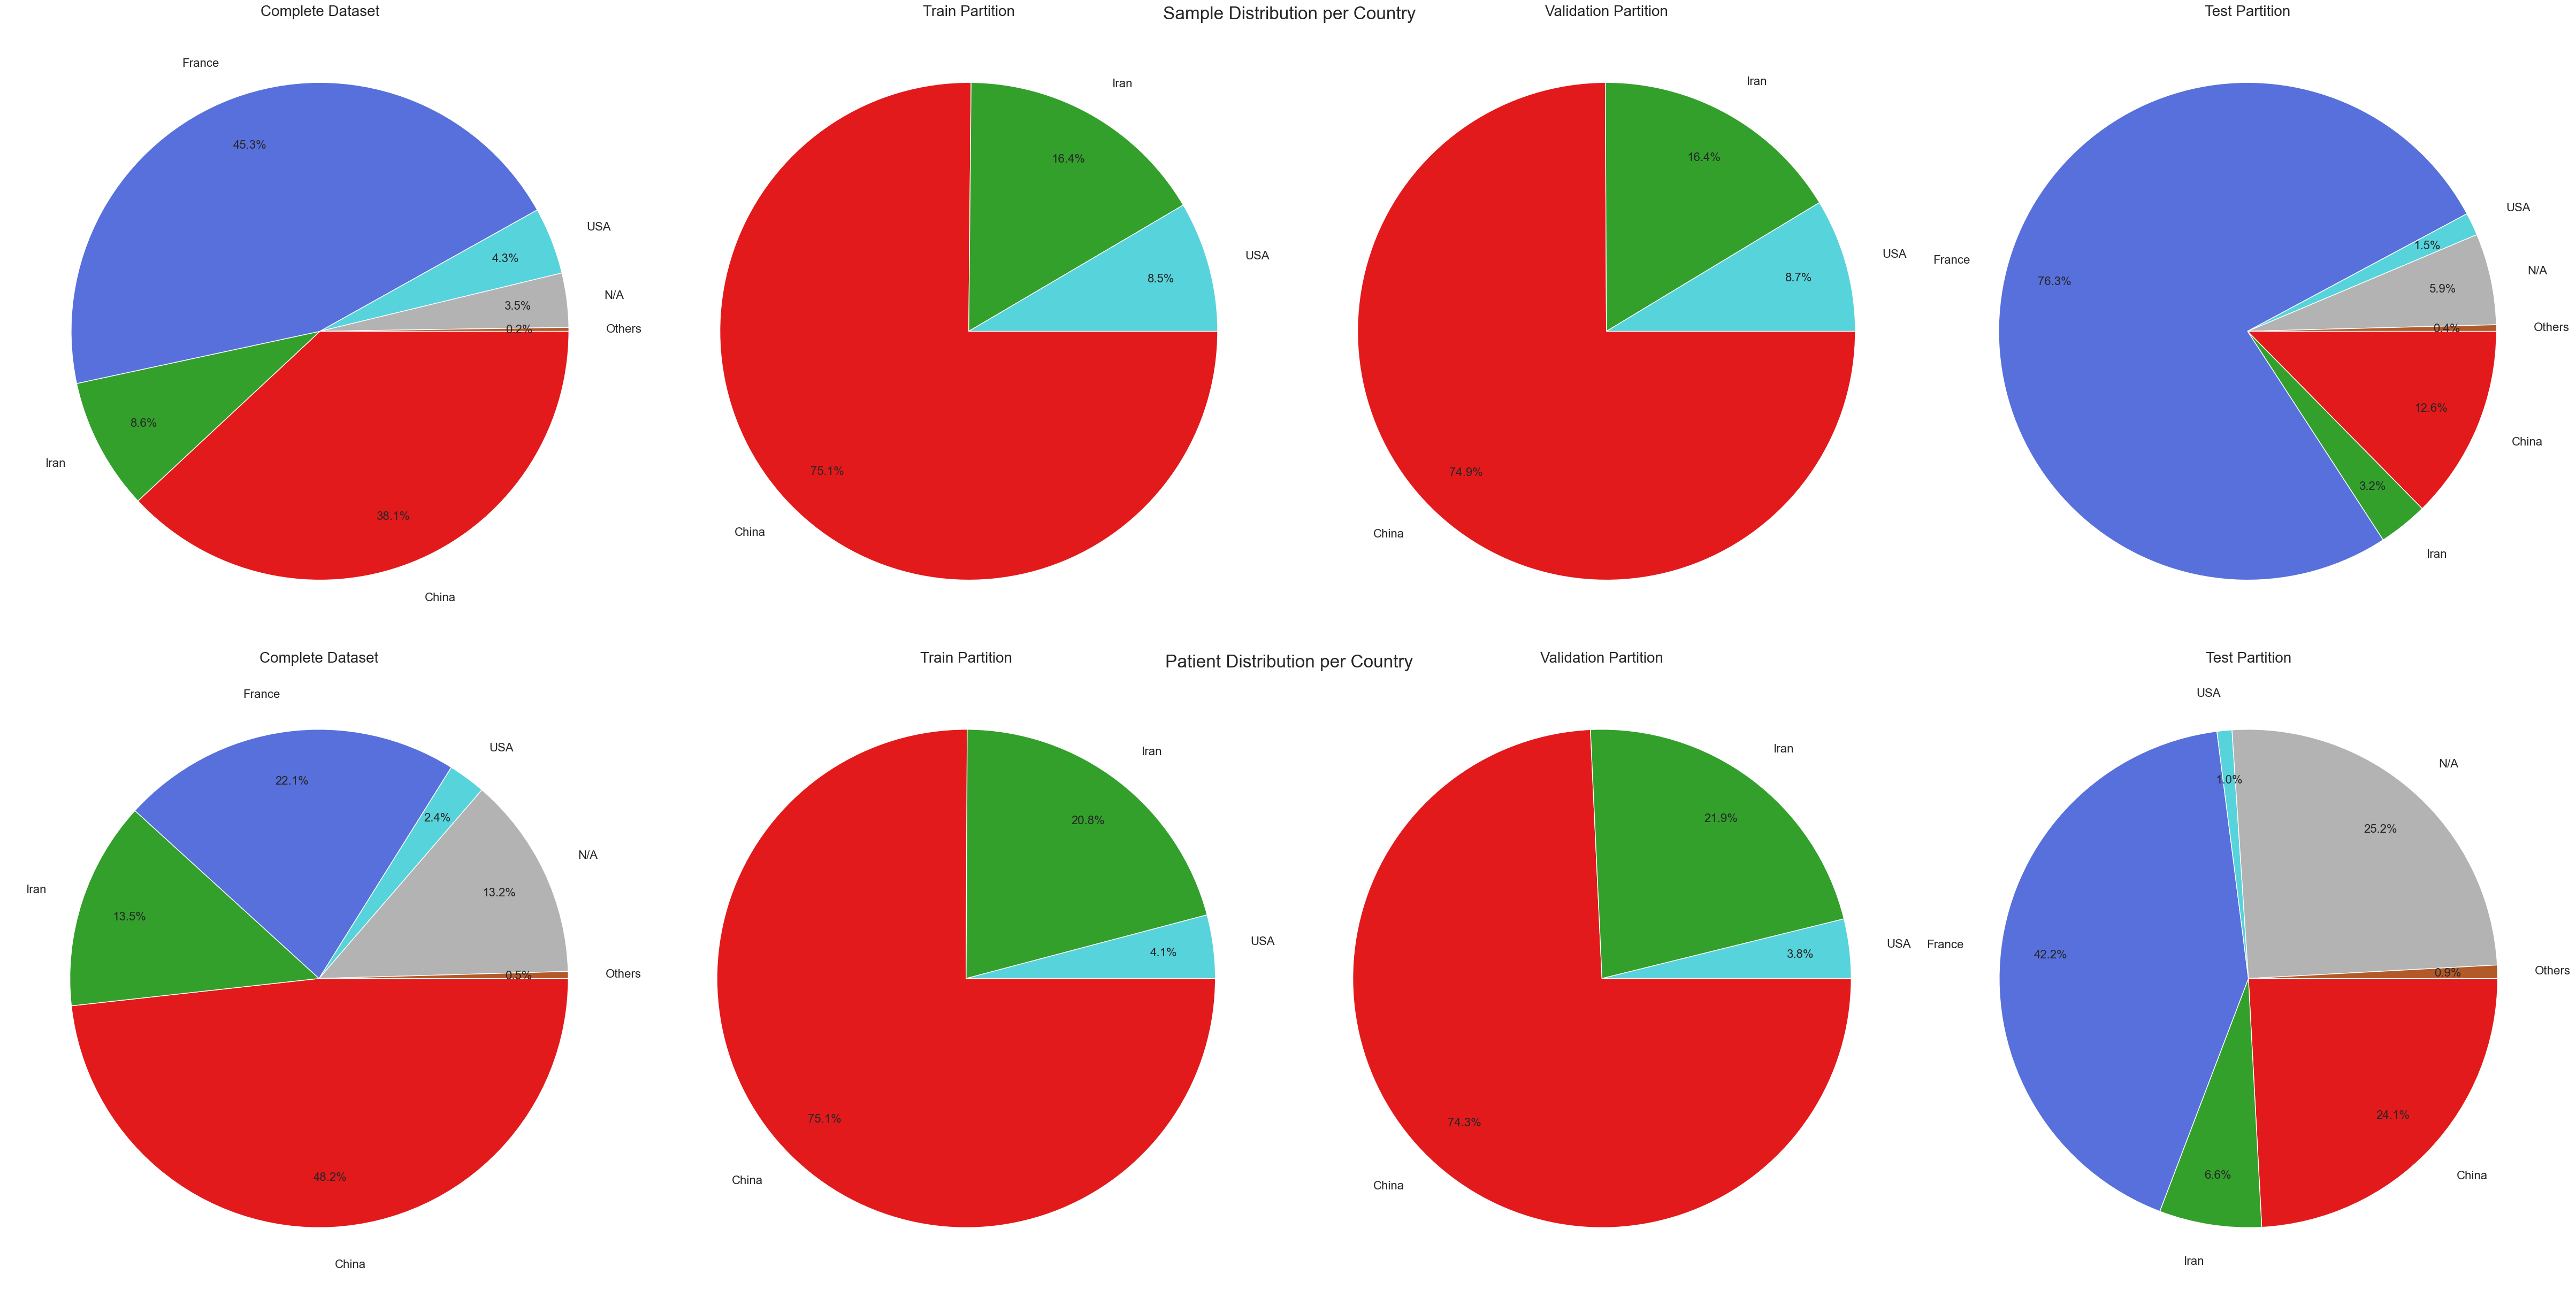

In [14]:
plot.column_as_pies( samples_df, patient_df, "country", dataset_name, figsize = (48, 24) )

In [15]:
plot.column_as_table( samples_df, patient_df, "country", dataset_name, bin_flag = False )

Sample Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 France 
 192361 
 0 
 0 
 192361 
 
 
 China 
 161749 
 98258 
 31680 
 31811 
 
 
 Iran 
 36452 
 21421 
 6943 
 8088 
 
 
 USA 
 18460 
 11071 
 3658 
 3731 
 
 
 N/A 
 14947 
 0 
 0 
 14947 
 
 
 Australia 
 287 
 0 
 0 
 287 
 
 
 Italy 
 240 
 0 
 0 
 240 
 
 
 Algeria 
 109 
 0 
 0 
 109 
 
 
 Belgium 
 72 
 0 
 0 
 72 
 
 
 England 
 72 
 0 
 0 
 72 
 
 
 Scotland 
 71 
 0 
 0 
 71 
 
 
 Turkey 
 41 
 0 
 0 
 41 
 
 
 Azerbaijan 
 39 
 0 
 0 
 39 
 
 
 Lebanon 
 33 
 0 
 0 
 33 
 
 
 Ukraine 
 33 
 0 
 0 
 33 
 
 
 Afghanistan 
 29 
 0 
 0 
 29 
 
 
 Peru 
 29 
 0 
 0 
 29 
 
 
 SUM 
 425024 
 130750 
 42281 
 251993 
 
 
 Patient Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 China 
 2563 
 1388 
 502 
 673 
 
 
 France 
 1176 
 0 
 0 
 1176 
 
 
 Iran 
 718 
 385 
 148 
 185 
 
 
 N/A 
 702 
 0 
 0 
 702 
 
 
 USA 
 129 
 76 
 26 
 27 
 
 
 Australia 
 7 
 0 
 0 
 7 
 
 
 Algeria 
 5 
 0 
 0 
 5 
 
 
 Italy 
 3 
 0 
 0 
 3 
 
 
 Afghanistan 
 1 
 0 
 0 
 1 
 
 
 Azerbaijan 
 1 
 0 
 0 
 1 
 
 
 Belgium 
 1 
 0 
 0 
 1 
 
 
 England 
 1 
 0 
 0 
 1 
 
 
 Lebanon 
 1 
 0 
 0 
 1 
 
 
 Peru 
 1 
 0 
 0 
 1 
 
 
 Scotland 
 1 
 0 
 0 
 1 
 
 
 Turkey 
 1 
 0 
 0 
 1 
 
 
 Ukraine 
 1 
 0 
 0 
 1 
 
 
 SUM 
 5312 
 1849 
 676 
 2787

## Age

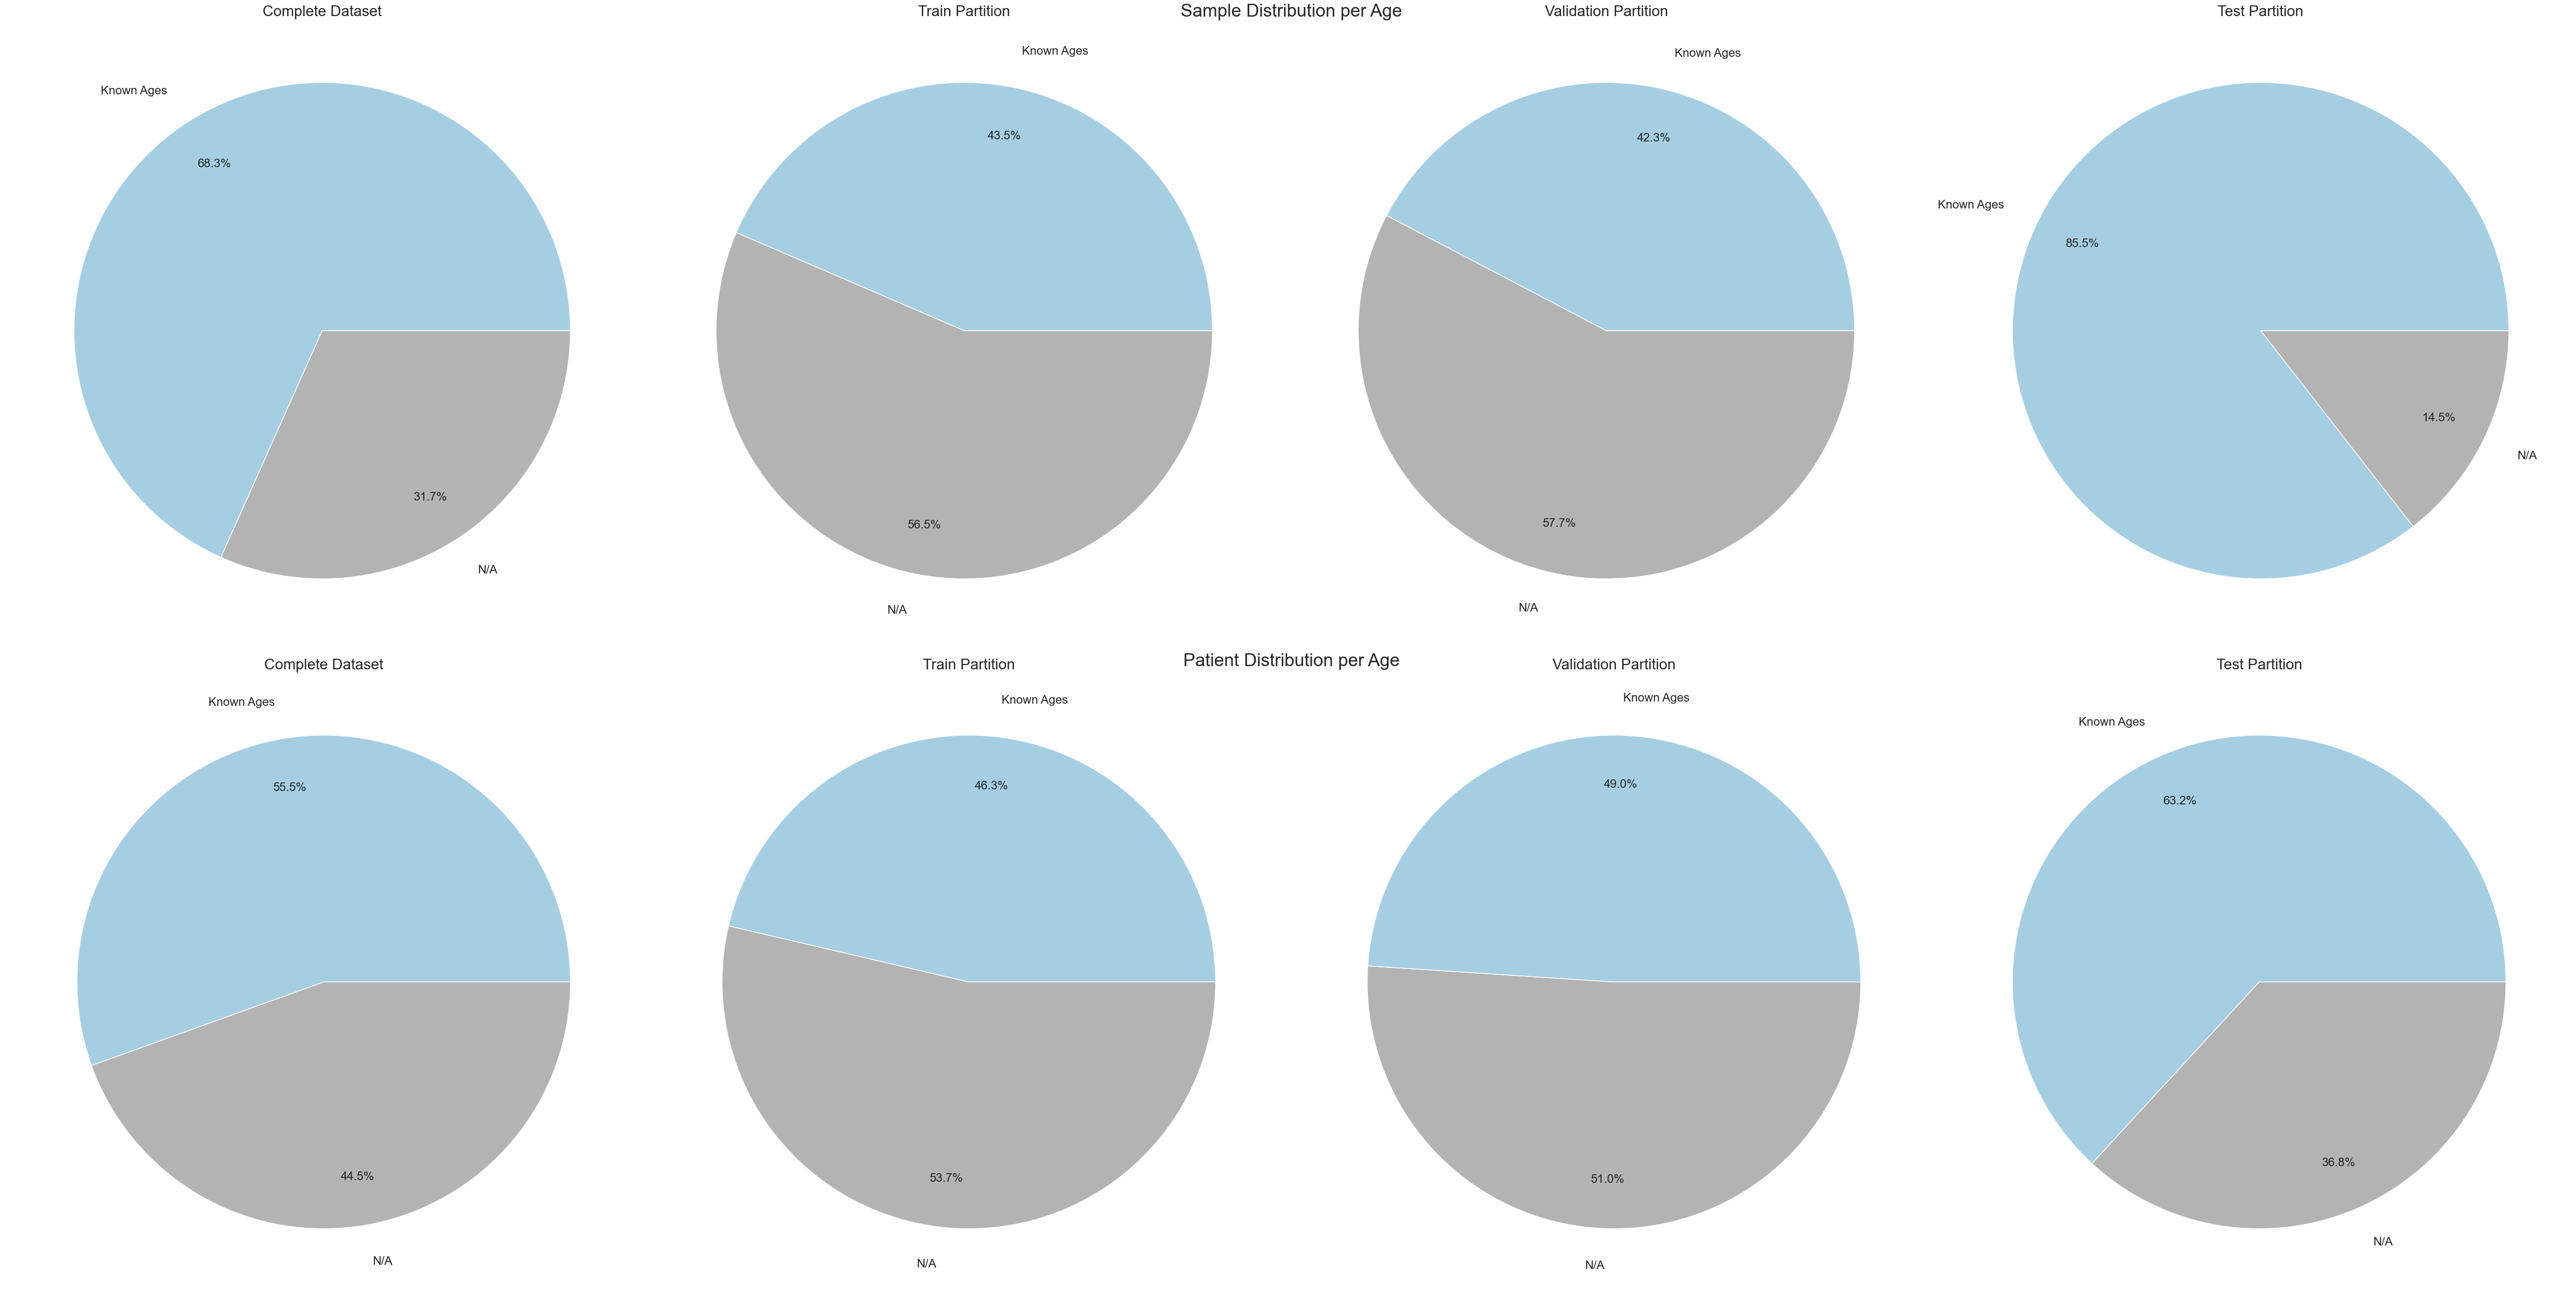

In [16]:
plot.column_as_pies( samples_df, patient_df, "age", dataset_name, figsize = (48, 24))

In [17]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = False )

Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 134694 
 73834 
 24388 
 36472 
 
 
 Known Ages 
 290330 
 56916 
 17893 
 215521 
 
 
 SUM 
 425024 
 130750 
 42281 
 251993 
 
 
 Patient Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 2364 
 992 
 345 
 1027 
 
 
 Known Ages 
 2948 
 857 
 331 
 1760 
 
 
 SUM 
 5312 
 1849 
 676 
 2787

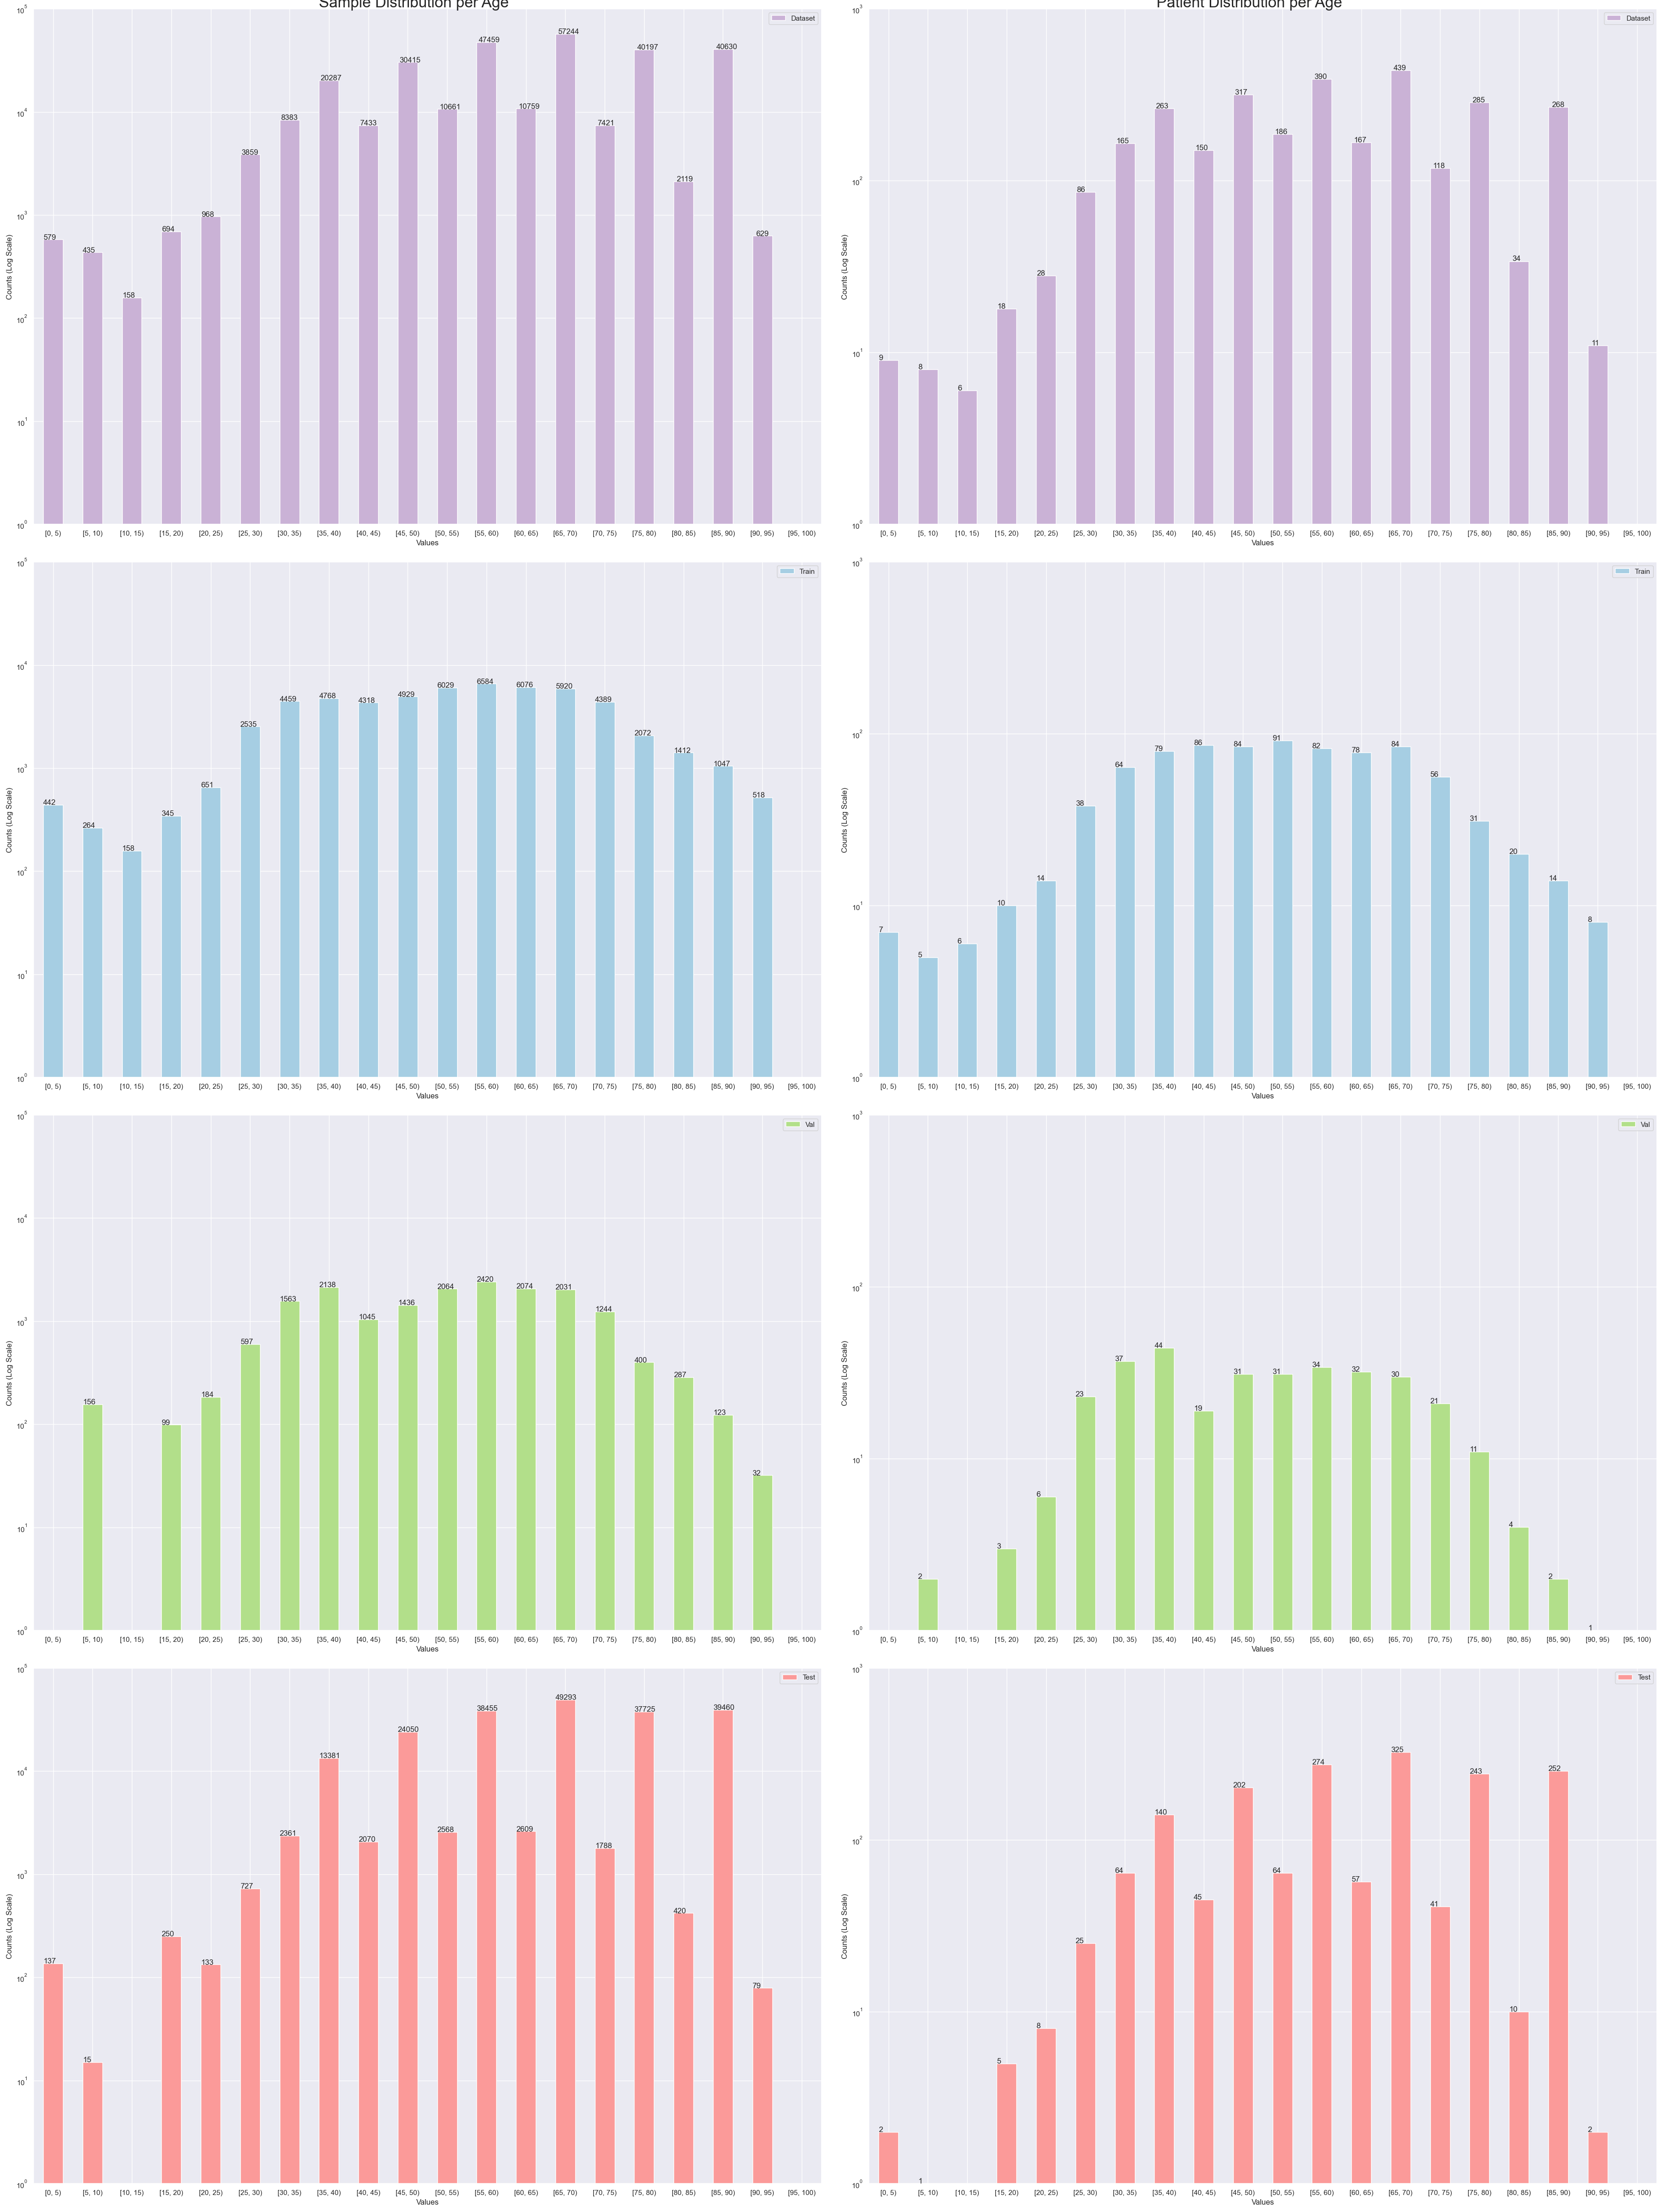

In [18]:
plot.column_as_histograms( samples_df, patient_df, "age", dataset_name, figsize = (36, 48))

In [19]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = True )

Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 579 
 442 
 0 
 137 
 
 
 [5, 10) 
 435 
 264 
 156 
 15 
 
 
 [10, 15) 
 158 
 158 
 0 
 0 
 
 
 [15, 20) 
 694 
 345 
 99 
 250 
 
 
 [20, 25) 
 968 
 651 
 184 
 133 
 
 
 [25, 30) 
 3859 
 2535 
 597 
 727 
 
 
 [30, 35) 
 8383 
 4459 
 1563 
 2361 
 
 
 [35, 40) 
 20287 
 4768 
 2138 
 13381 
 
 
 [40, 45) 
 7433 
 4318 
 1045 
 2070 
 
 
 [45, 50) 
 30415 
 4929 
 1436 
 24050 
 
 
 [50, 55) 
 10661 
 6029 
 2064 
 2568 
 
 
 [55, 60) 
 47459 
 6584 
 2420 
 38455 
 
 
 [60, 65) 
 10759 
 6076 
 2074 
 2609 
 
 
 [65, 70) 
 57244 
 5920 
 2031 
 49293 
 
 
 [70, 75) 
 7421 
 4389 
 1244 
 1788 
 
 
 [75, 80) 
 40197 
 2072 
 400 
 37725 
 
 
 [80, 85) 
 2119 
 1412 
 287 
 420 
 
 
 [85, 90) 
 40630 
 1047 
 123 
 39460 
 
 
 [90, 95) 
 629 
 518 
 32 
 79 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 290330 
 56916 
 17893 
 215521 
 
 
 Patient Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 9 
 7 
 0 
 2 
 
 
 [5, 10) 
 8 
 5 
 2 
 1 
 
 
 [10, 15) 
 6 
 6 
 0 
 0 
 
 
 [15, 20) 
 18 
 10 
 3 
 5 
 
 
 [20, 25) 
 28 
 14 
 6 
 8 
 
 
 [25, 30) 
 86 
 38 
 23 
 25 
 
 
 [30, 35) 
 165 
 64 
 37 
 64 
 
 
 [35, 40) 
 263 
 79 
 44 
 140 
 
 
 [40, 45) 
 150 
 86 
 19 
 45 
 
 
 [45, 50) 
 317 
 84 
 31 
 202 
 
 
 [50, 55) 
 186 
 91 
 31 
 64 
 
 
 [55, 60) 
 390 
 82 
 34 
 274 
 
 
 [60, 65) 
 167 
 78 
 32 
 57 
 
 
 [65, 70) 
 439 
 84 
 30 
 325 
 
 
 [70, 75) 
 118 
 56 
 21 
 41 
 
 
 [75, 80) 
 285 
 31 
 11 
 243 
 
 
 [80, 85) 
 34 
 20 
 4 
 10 
 
 
 [85, 90) 
 268 
 14 
 2 
 252 
 
 
 [90, 95) 
 11 
 8 
 1 
 2 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 2948 
 857 
 331 
 1760

## Sex

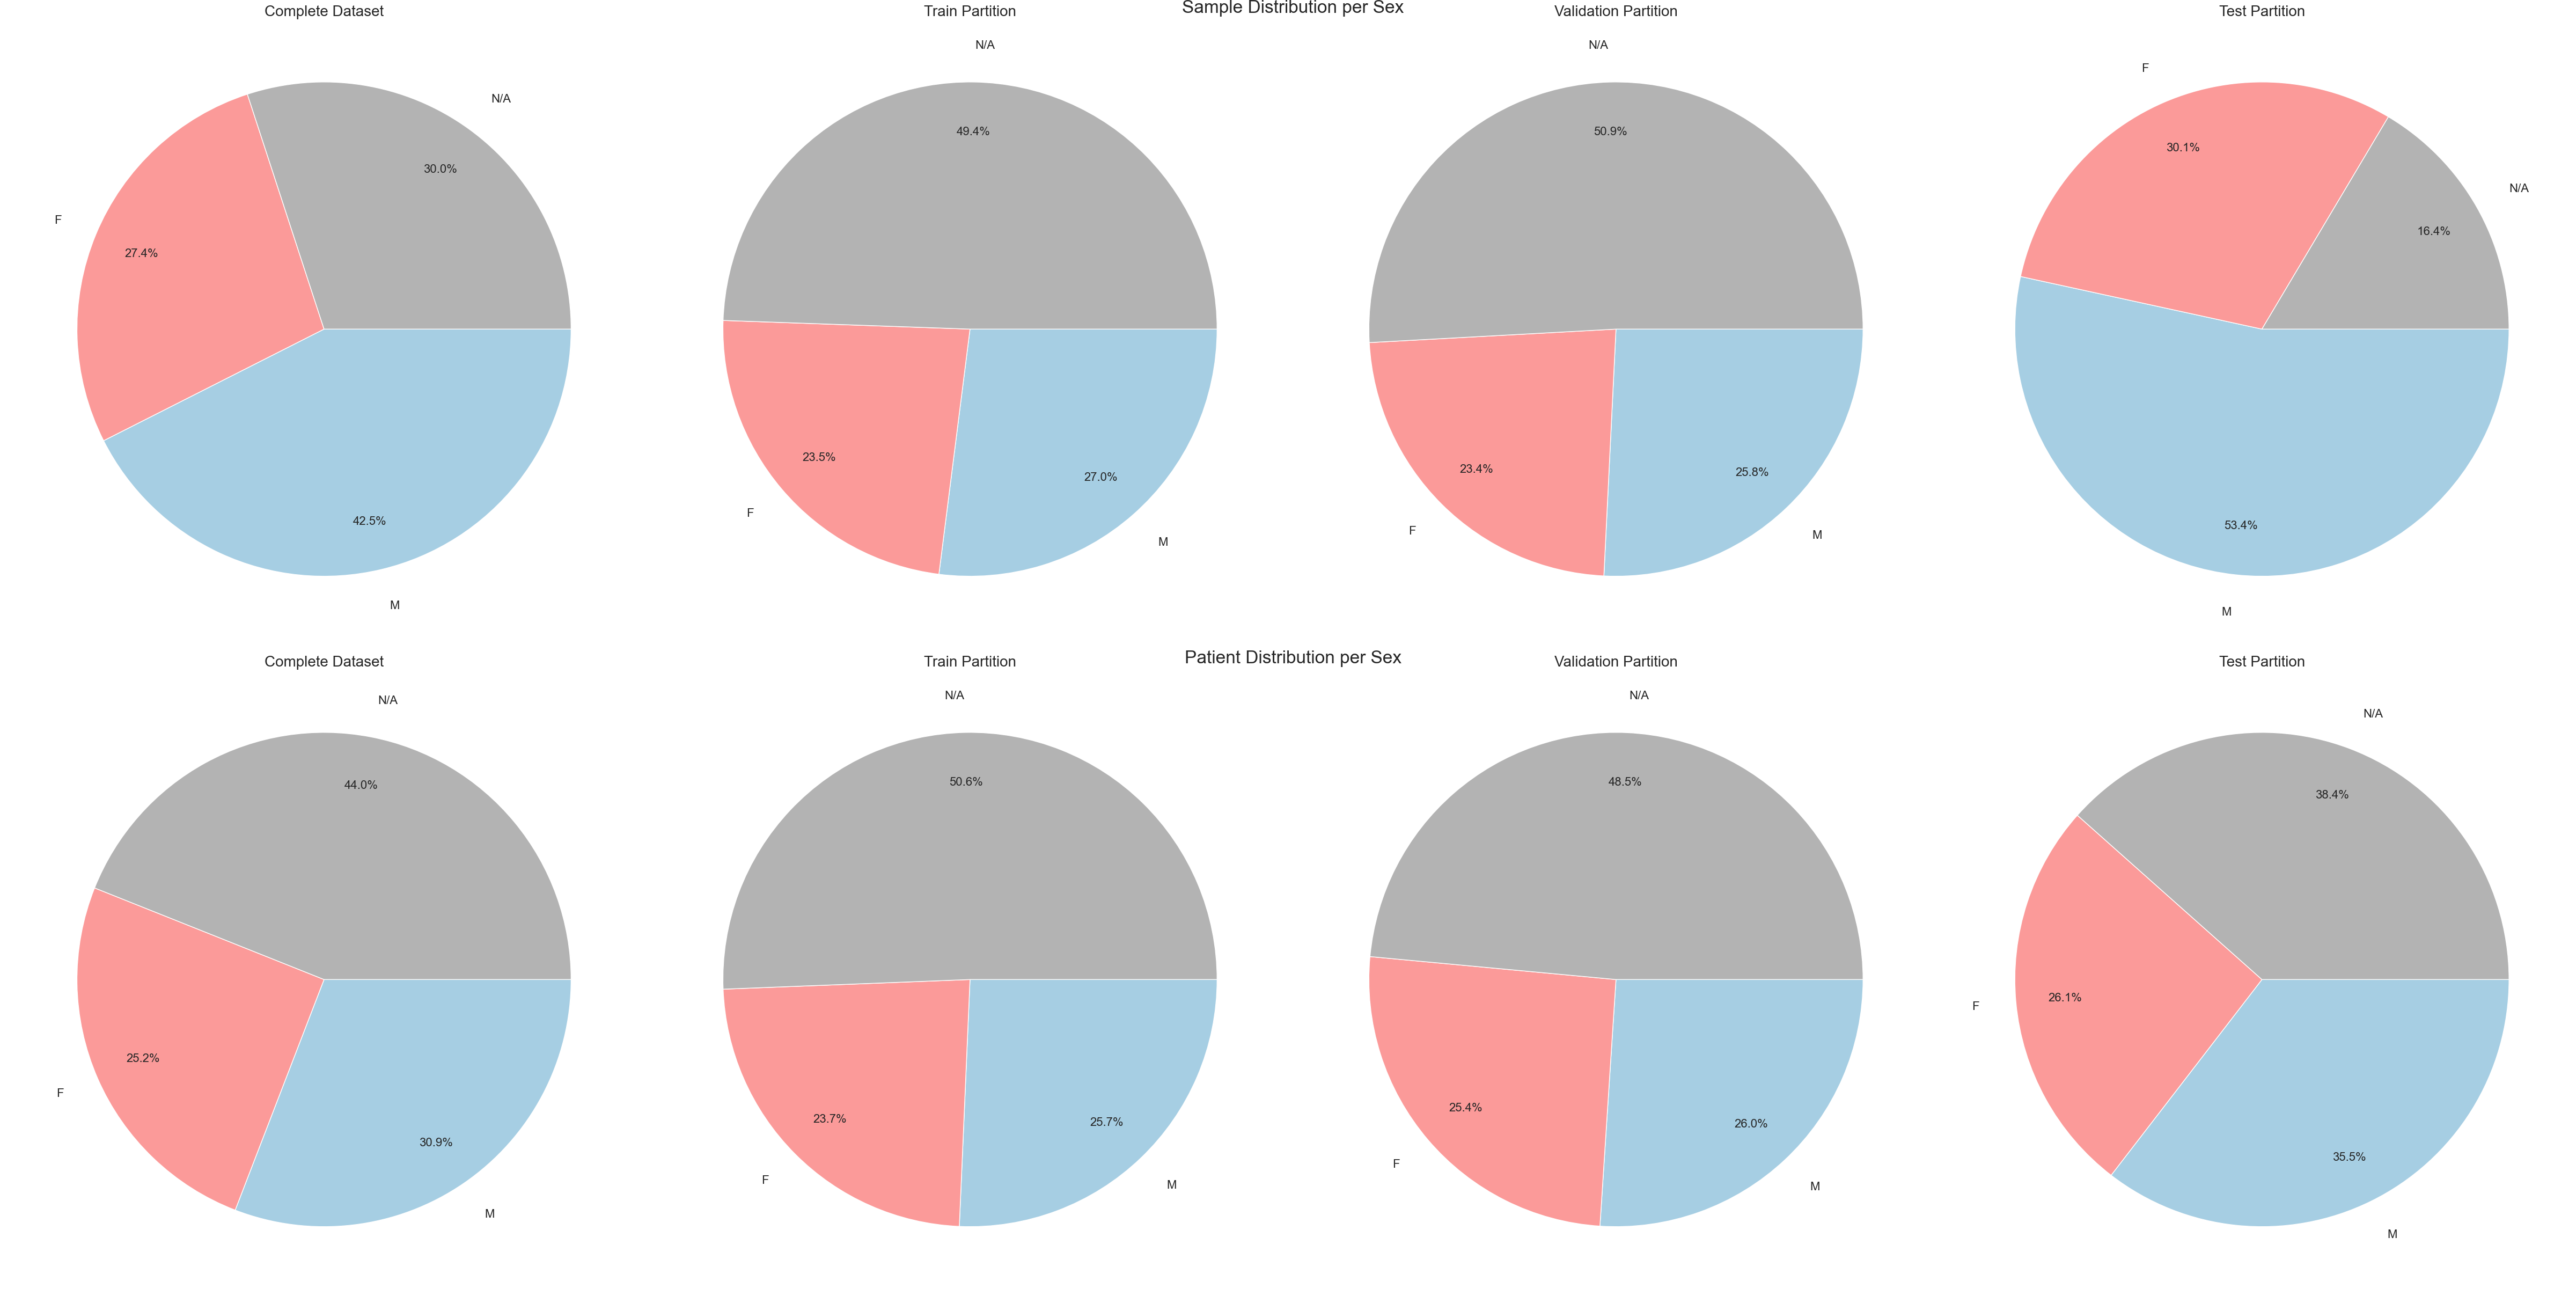

In [20]:
plot.column_as_pies( samples_df, patient_df, "sex", dataset_name, figsize = (48, 24) )

In [21]:
plot.column_as_table( samples_df, patient_df, "sex", dataset_name, bin_flag = False )

Sample Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 M 
 180817 
 35316 
 10900 
 134601 
 
 
 N/A 
 127602 
 64644 
 21508 
 41450 
 
 
 F 
 116605 
 30790 
 9873 
 75942 
 
 
 SUM 
 425024 
 130750 
 42281 
 251993 
 
 
 Patient Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 2335 
 936 
 328 
 1071 
 
 
 M 
 1639 
 475 
 176 
 988 
 
 
 F 
 1338 
 438 
 172 
 728 
 
 
 SUM 
 5312 
 1849 
 676 
 2787

## Slice Selection

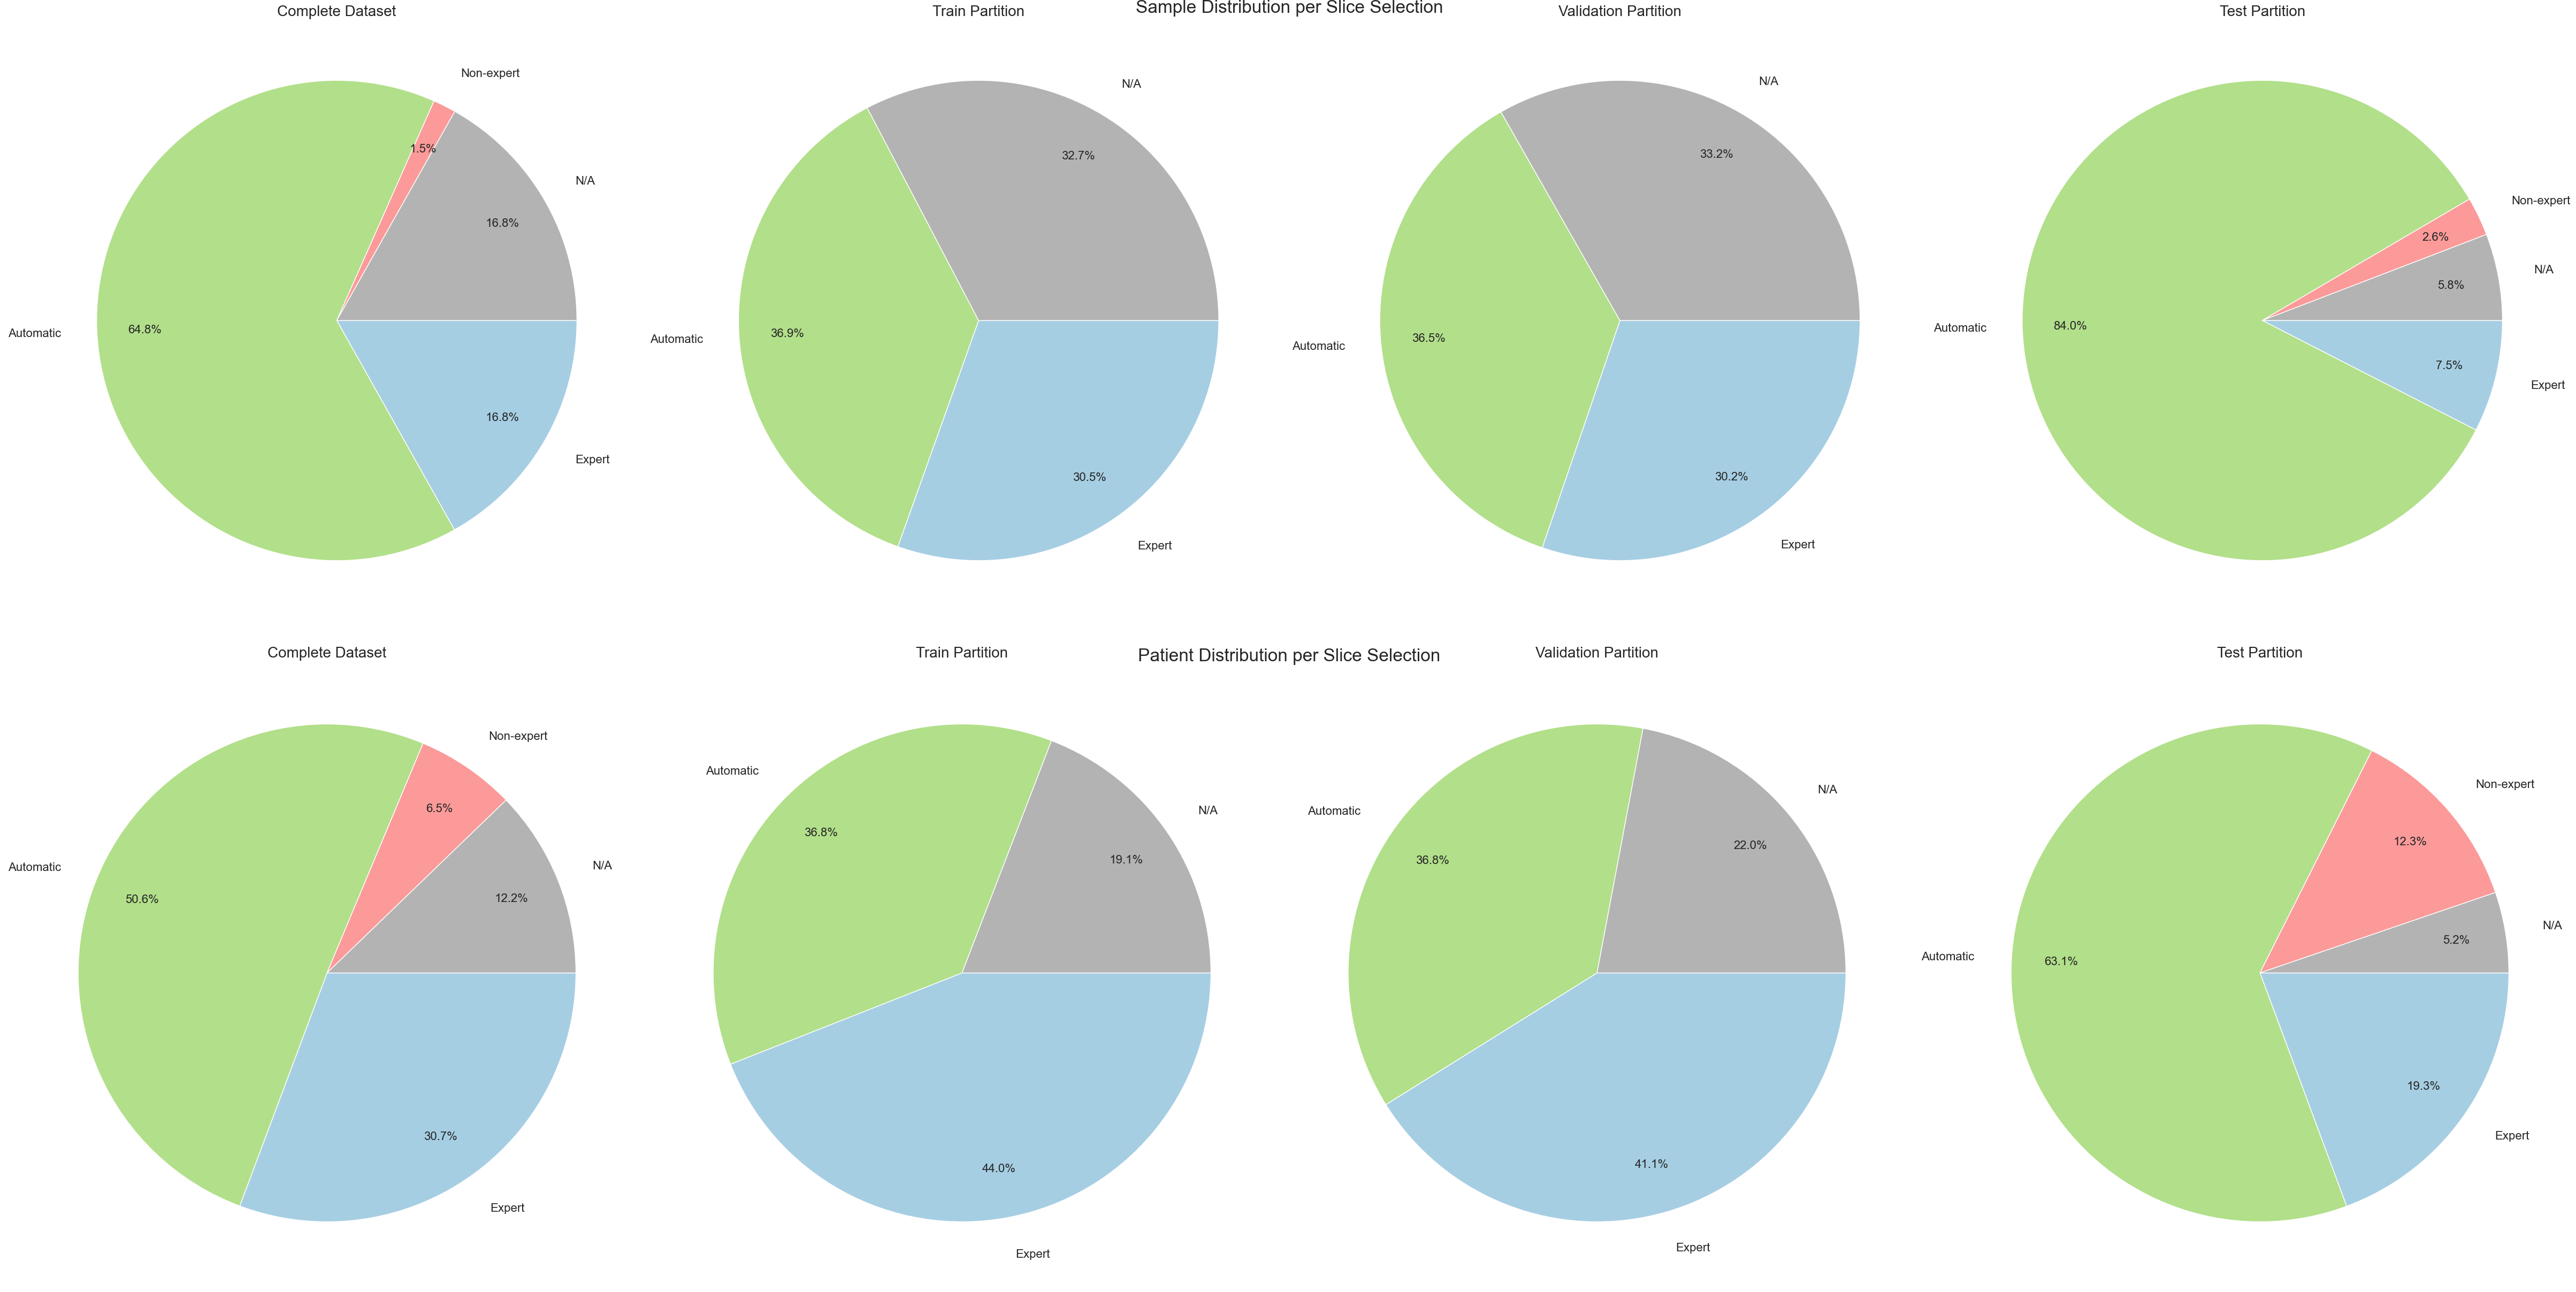

In [22]:
plot.column_as_pies( samples_df, patient_df, "slice_selection", dataset_name, figsize = (48, 24) )

In [23]:
plot.column_as_table( samples_df, patient_df, "slice_selection", dataset_name, bin_flag = False )

Sample Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Automatic 
 275366 
 48192 
 15436 
 211738 
 
 
 Expert 
 71615 
 39828 
 12787 
 19000 
 
 
 N/A 
 71488 
 42730 
 14058 
 14700 
 
 
 Non-expert 
 6555 
 0 
 0 
 6555 
 
 
 SUM 
 425024 
 130750 
 42281 
 251993 
 
 
 Patient Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Automatic 
 2688 
 681 
 249 
 1758 
 
 
 Expert 
 1631 
 814 
 278 
 539 
 
 
 N/A 
 649 
 354 
 149 
 146 
 
 
 Non-expert 
 344 
 0 
 0 
 344 
 
 
 SUM 
 5312 
 1849 
 676 
 2787

## Verified Findings

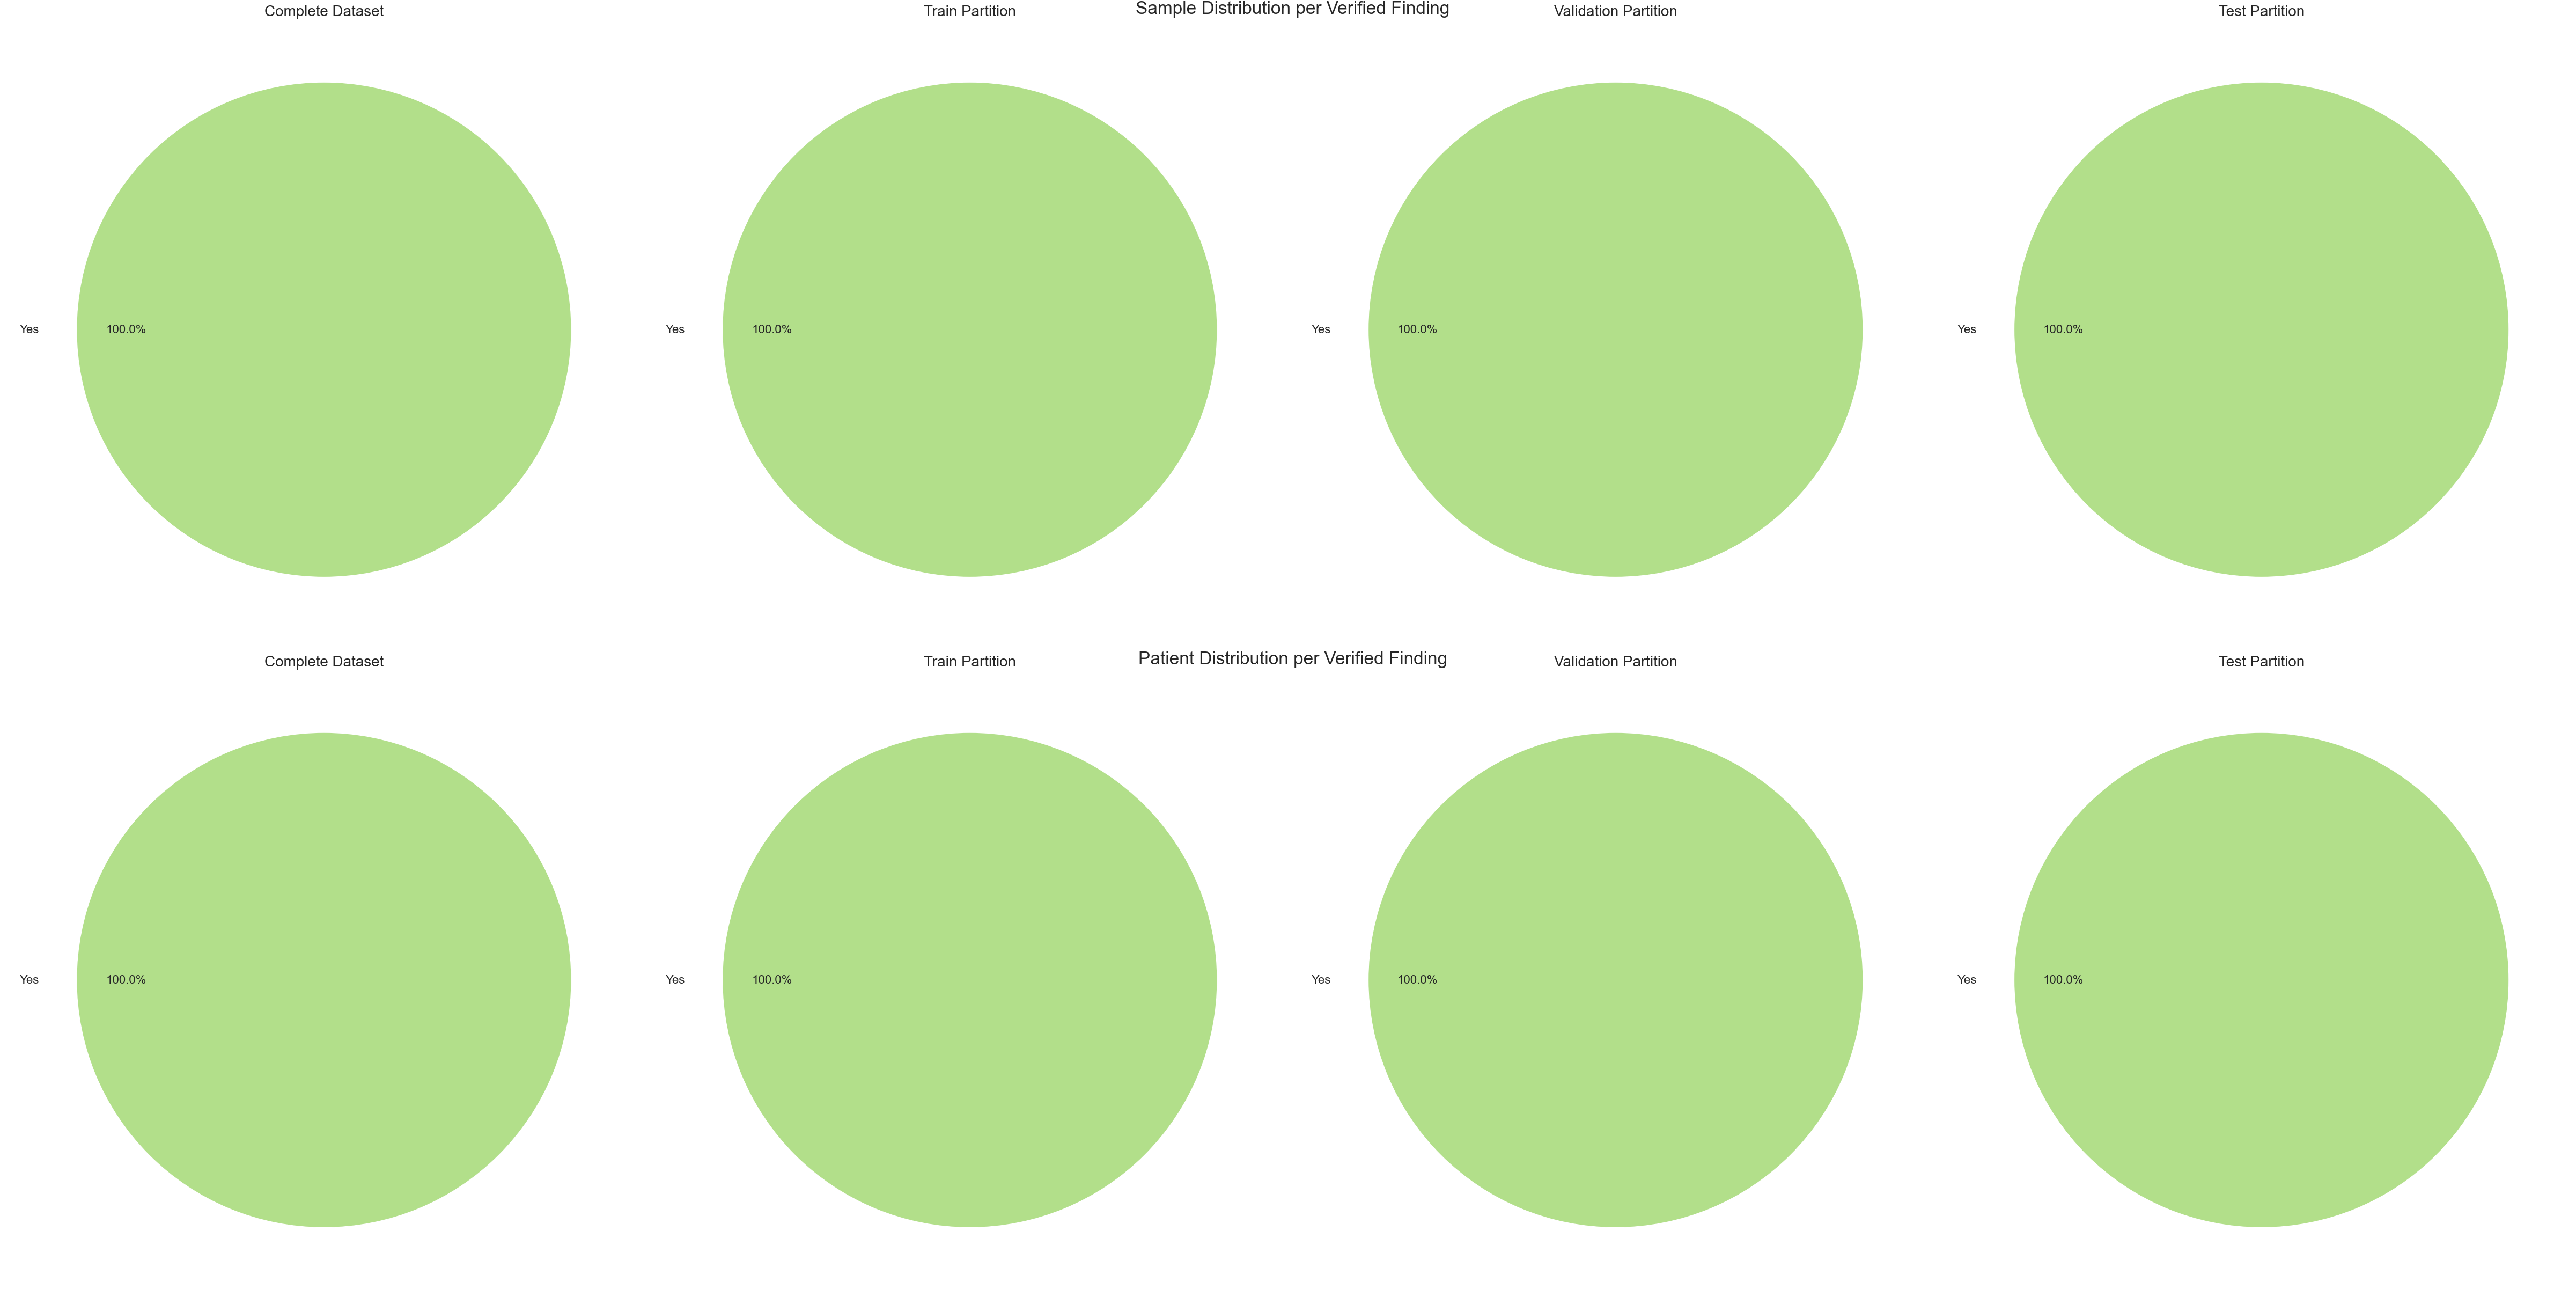

In [24]:
plot.column_as_pies( samples_df, patient_df, "verified_finding", dataset_name, figsize = (48, 24) )

In [25]:
plot.column_as_table( samples_df, patient_df, "verified_finding", dataset_name, bin_flag = False )

Sample Distribution
 by Verified Finding 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Yes 
 425024 
 130750 
 42281 
 251993 
 
 
 SUM 
 425024 
 130750 
 42281 
 251993 
 
 
 Patient Distribution
 by Verified Finding 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Yes 
 5312 
 1849 
 676 
 2787 
 
 
 SUM 
 5312 
 1849 
 676 
 2787

## View

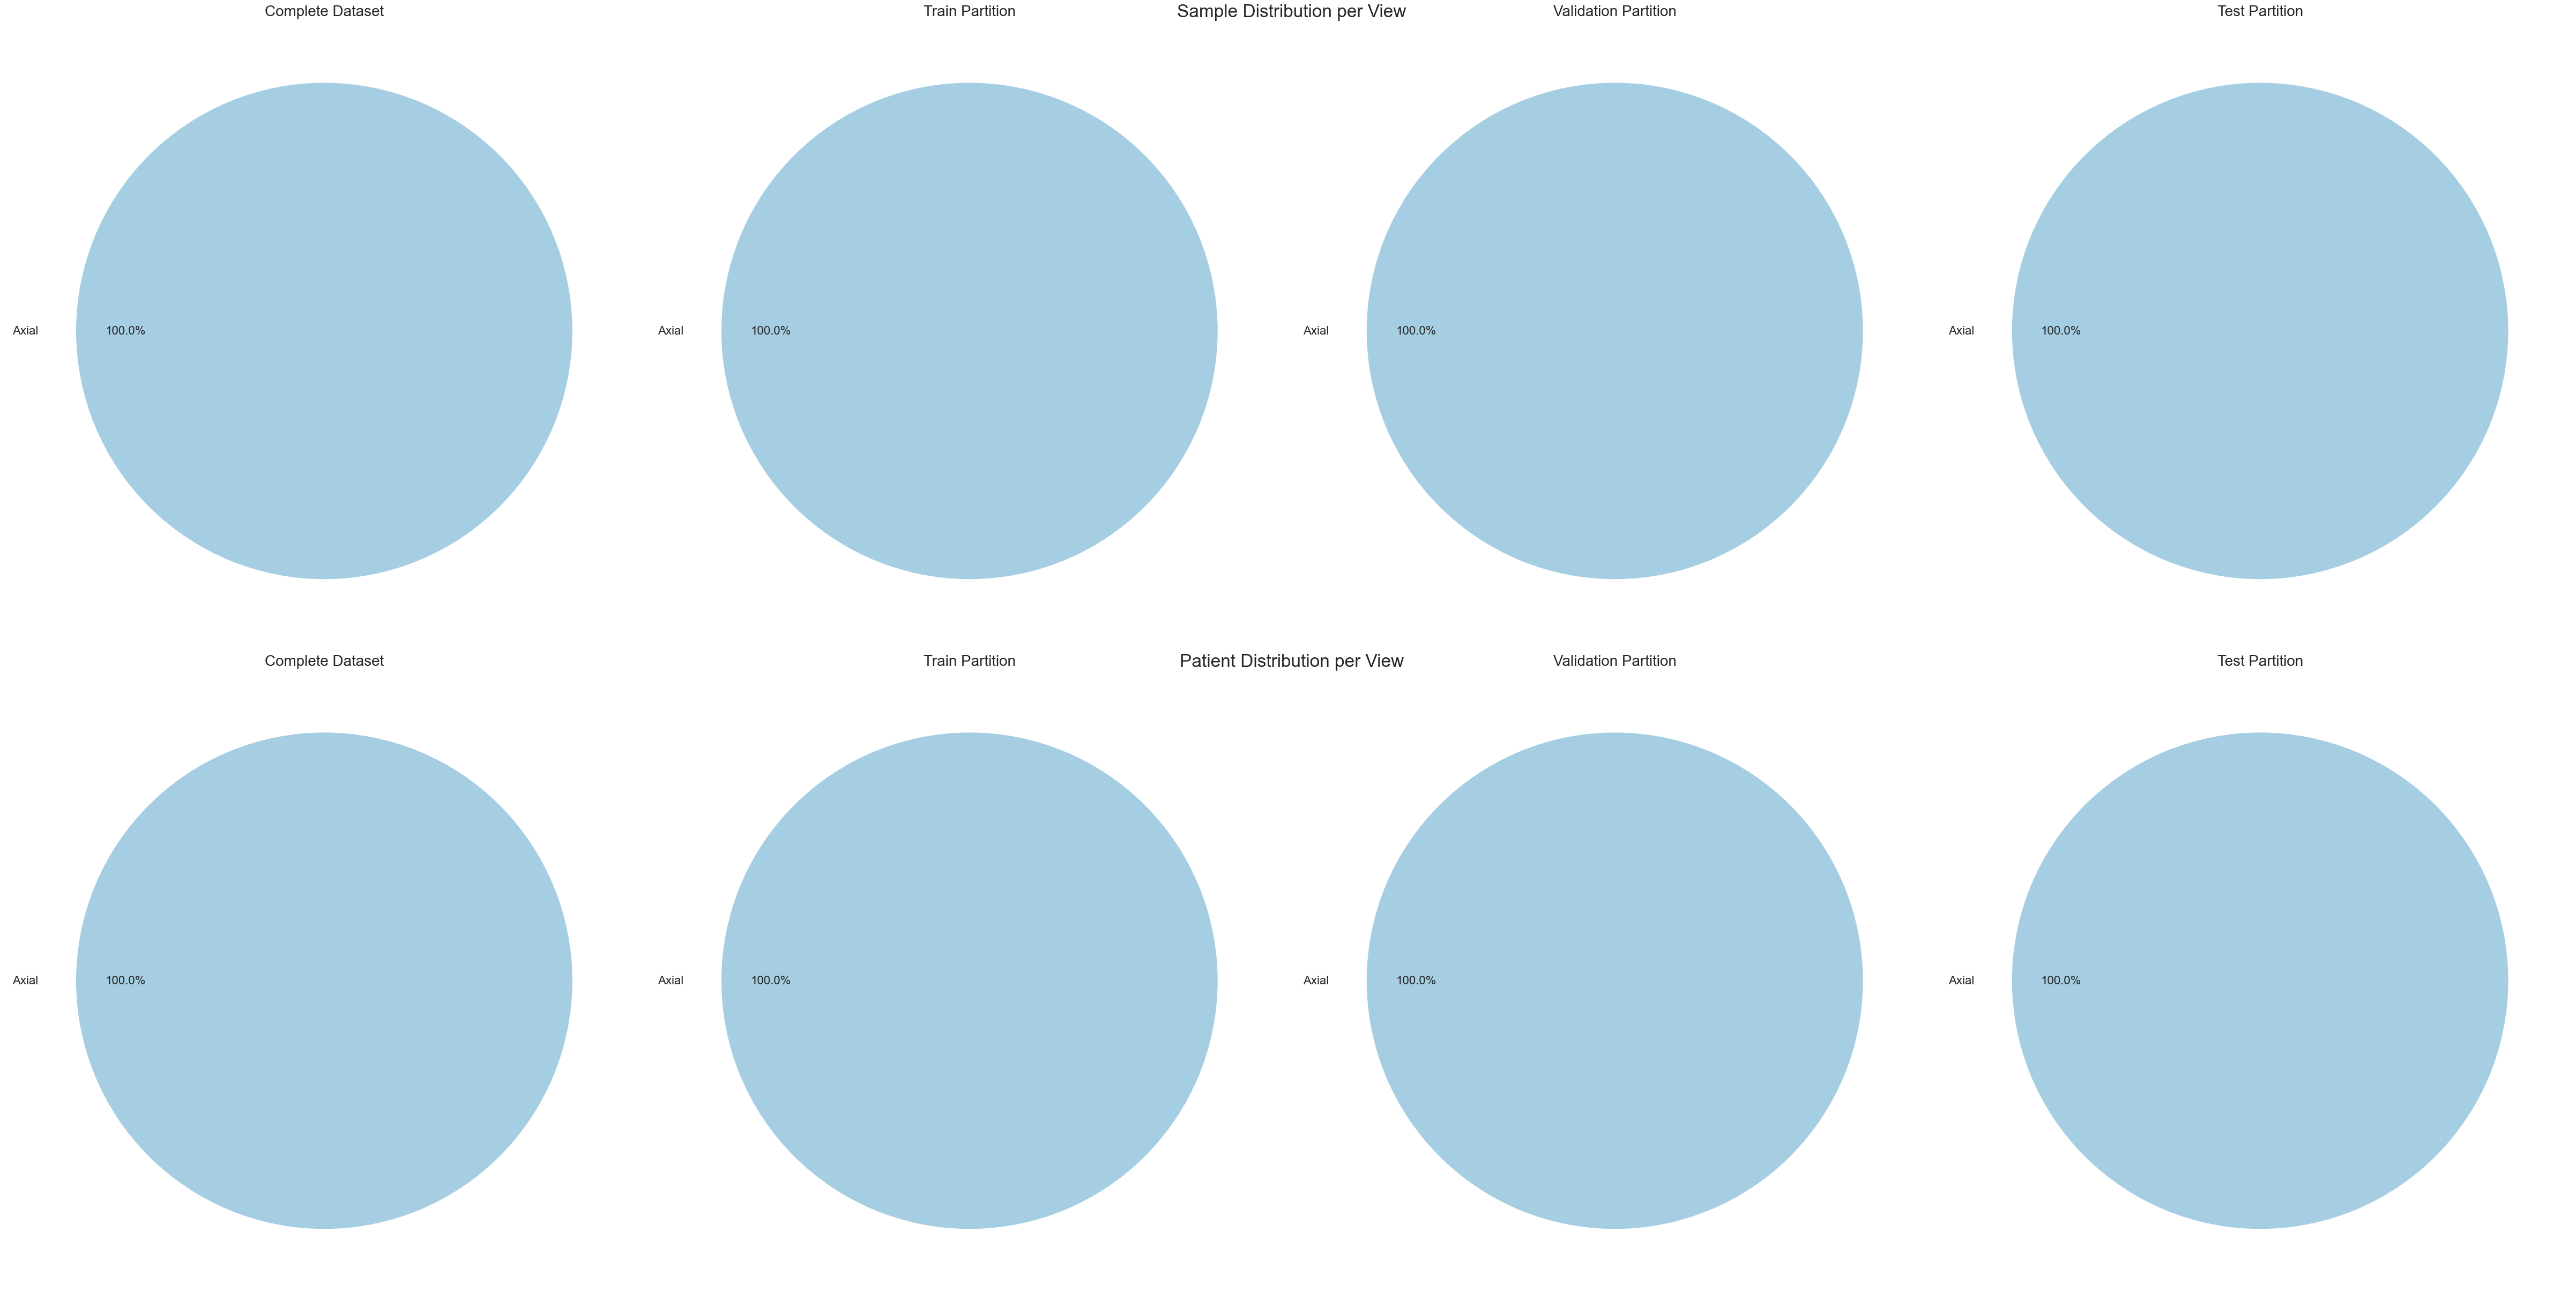

In [26]:
plot.column_as_pies( samples_df, patient_df, "view", dataset_name, figsize = (48, 24) )

In [27]:
plot.column_as_table( samples_df, patient_df, "view", dataset_name, bin_flag = False )

Sample Distribution
 by View 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Axial 
 425024 
 130750 
 42281 
 251993 
 
 
 SUM 
 425024 
 130750 
 42281 
 251993 
 
 
 Patient Distribution
 by View 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Axial 
 5312 
 1849 
 676 
 2787 
 
 
 SUM 
 5312 
 1849 
 676 
 2787

## Modality

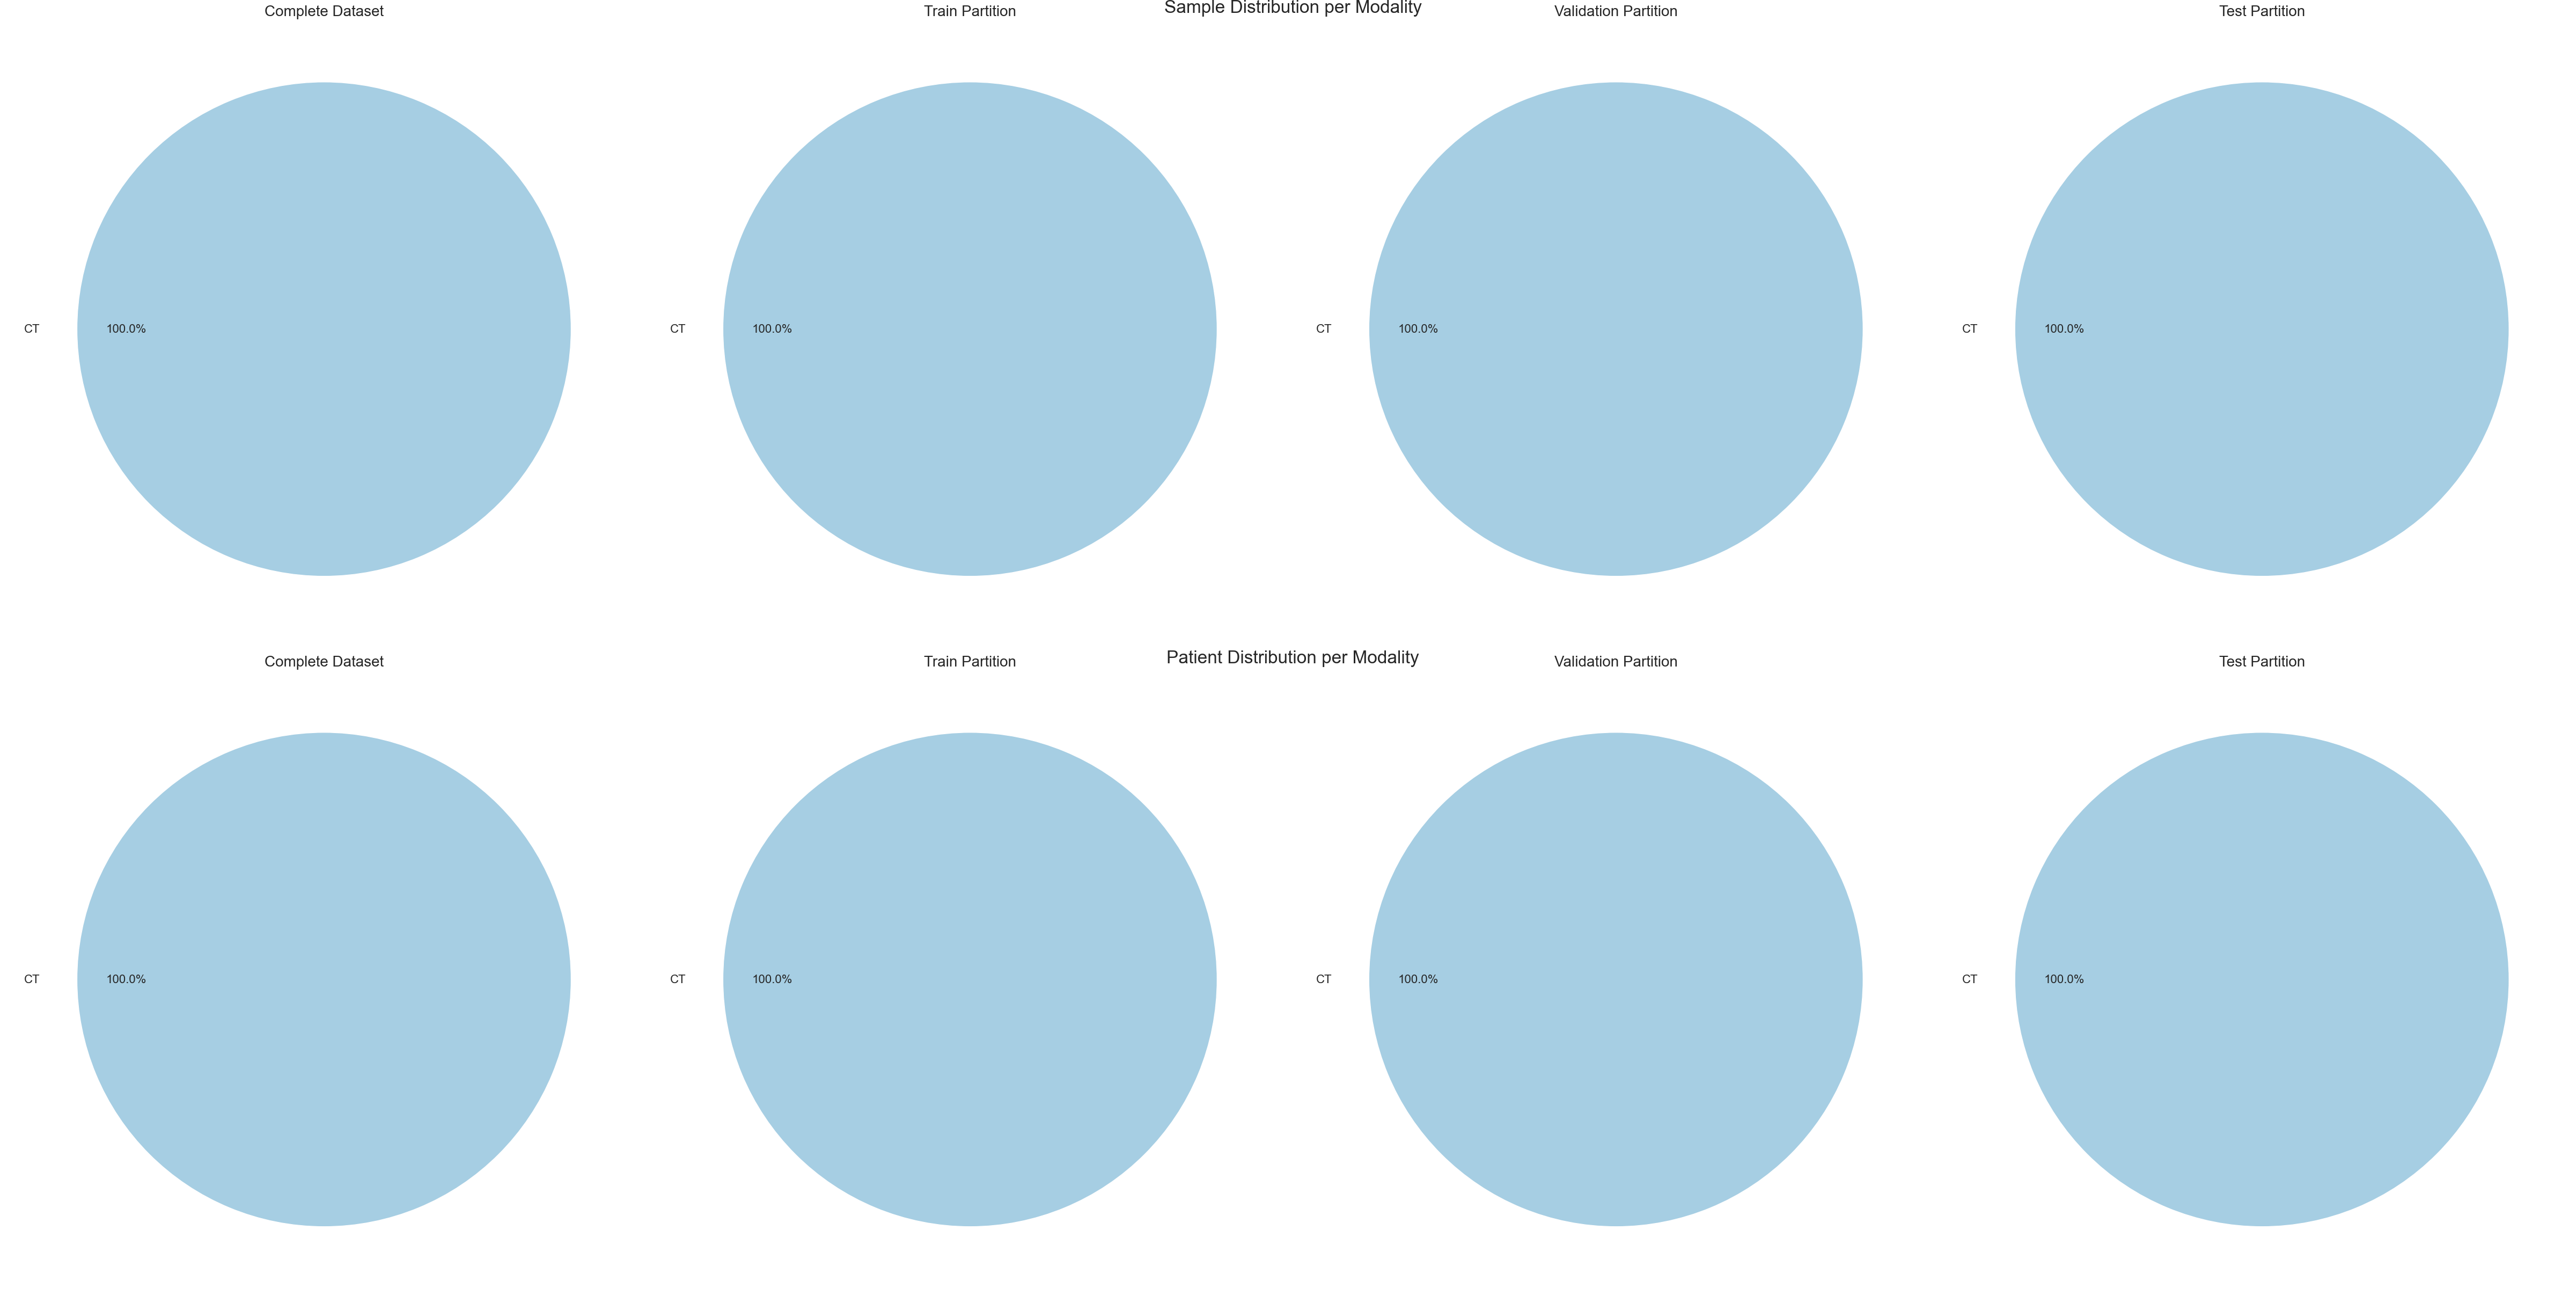

In [28]:
plot.column_as_pies( samples_df, patient_df, "modality", dataset_name, figsize = (48, 24) )

In [29]:
plot.column_as_table( samples_df, patient_df, "modality", dataset_name, bin_flag = False )

Sample Distribution
 by Modality 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 CT 
 425024 
 130750 
 42281 
 251993 
 
 
 SUM 
 425024 
 130750 
 42281 
 251993 
 
 
 Patient Distribution
 by Modality 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 CT 
 5312 
 1849 
 676 
 2787 
 
 
 SUM 
 5312 
 1849 
 676 
 2787